In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

import numpy as np
import pandas as pd
import math

import statistics as sts
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)


If you are facing any difficulty in performing EDA, follow the steps mentioned below:

Step - 1:  

Introduction -> Give a detailed data description and objective

Step - 2:  

Import the data and display the head, shape and description of the data.

Step - 3:   

Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..
-	Find the outliers in each numerical column
-	Understand the probability and frequency distribution of each numerical column
-	Understand the frequency distribution of each categorical Variable/Column
-	Mention observations after each plot.

Step - 4:

Bivariate Analysis

-	Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..  
-	Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..  
-	Mention observations after each plot.  

Step - 5:

Research Questions    

-	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
-	Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

Step - 6:

Conclusion

Step - 7 - (Bonus) Come up with some interesting conclusions or research questions.   
NOTE: Mention observations after each plot.   

For the below mentioned step do your own research (use Google). Hints are given below.   
Step - 7 - Perform feature transformation:   
-	For Numerical Features -> Do Column Standardization   
-	For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.


--------------------------------------------------- END OF TASK--------------------------------------------------- 




The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  

$$ Summary\ Table\ for\ dataset $$



| VARIABLES 	| TYPE 	| Description 	|
|:-:	|:-:	|:-:	|
| ID 	| UID 	| A unique ID to identify a candidate 	|
| Salary 	| Continuous 	| Annual CTC oﬀered to the candidate (in INR) 	|
| DOJ 	| Date 	| Date of joining the company 	|
| DOL 	| Date 	| Date of leaving the company 	|
| Designation 	| Categorical 	| Designation oﬀered in the job 	|
| JobCity 	| Categorical 	| Location of the job (city) 	|
| Gender 	| Categorical 	| Candidate’s gender 	|
| DOB 	| Date 	| Date of birth of candidate 	|
| 10percentage 	| Continuous 	| Overall marks obtained in grade 10<br>examinations 	|
| 10board 	| Continuous 	| The school board whose curriculum the candidate followed in grade 10 	|
| 12graduation 	| Date 	| Year of graduation - senior year high school 	|
| 12percentage 	| Continuous 	| Overall marks obtained in grade 12<br>examinations 	|
| 12board 	| Date 	| The school board whose curriculum the candidate followed in grade 12 	|
| CollegeID 	| NA/ID 	| Unique ID identifying the college which the candidate attended 	|
| CollegeTier 	| Categorical 	| Tier of college 	|
| Degree 	| Categorical 	| Degree obtained/pursued by the candidate 	|
| Specialization 	| Categorical 	| Specialization pursued by the candidate 	|
| CollegeGPA 	| Continuous 	| Aggregate GPA at graduation 	|
| CollegeCityID 	| NA/ID 	| A unique ID to identify the city in which the college is located in 	|
| CollegeCityTier 	| Categorical 	| The tier of the city in which the college is located 	|
| CollegeState 	| Categorical 	| Name of States 	|
| GraduationYear 	| Date 	| Year of graduation (Bachelor’s degree) 	|
| English 	| Continuous 	| Scores in AMCAT English section 	|
| Logical 	| Continuous 	| Scores in AMCAT Logical section 	|
| Quant 	| Continuous 	| Scores in AMCAT Quantitative section 	|
| Domain 	| Continuous/ Standardized 	| Scores in AMCAT’s domain module 	|
| ComputerProgramming 	| Continuous 	| Score in AMCAT’s Computer programming<br>section 	|
| ElectronicsAndSemicon 	| Continuous 	| Score in AMCAT’s Electronics & Semiconductor Engineering section 	|
| ComputerScience 	| Continuous 	|  <br>Score in AMCAT’s Computer Science section 	|
| MechanicalEngg 	| Continuous 	| Score in AMCAT’s Mechanical Engineering<br>section 	|
| ElectricalEngg 	| Continuous 	| Score in AMCAT’s Electrical Engineering section 	|
| TelecomEngg 	| Continuous 	| Score in AMCAT’s Telecommunication Engineering section 	|
| CivilEngg 	| Continuous 	| Score in AMCAT’s Civil Engineering section 	|
| conscientiousness 	| Continuous/ Standardized 	| Scores in one of the sections of AMCAT’s personality test 	|
| agreeableness 	| Continuous/<br>Standardized 	| Scores in one of the sections of AMCAT’s<br>personality test 	|
| extraversion 	| Continuous/ Standardized 	| Scores in one of the sections of AMCAT’s personality test 	|
| neuroticism 	| Continuous/<br>Standardized 	| Scores in one of the sections of AMCAT’s<br>personality test 	|
| openess_to_experience 	| Continuous/ Standardized 	| Scores in one of the sections of AMCAT’s personality test 	|

### Objective:
- The objective is the check salary varies beased on the other features 
  - dependent variable - salary

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df.shape

(3998, 39)

**We have 3998 observations and 39 features in the data**

In [6]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [7]:
cat_col =[i for i in df.columns if df[i].dtype=='object']

In [8]:
cat_col

['Unnamed: 0',
 'DOL',
 'Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

In [9]:
len(cat_col)

10

**In the given columns 10 colums contain categorical data type observations**

In [10]:
num_col =[i for i in df.columns if (df[i].dtype== 'int64')|(df[i].dtype== 'float64') ]

In [11]:
num_col

['ID',
 'Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeID',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [12]:
len(num_col)

27

**In the given columns 27 colums contain numarical data type observations**

In [13]:
date_time =[i for i in df.columns if df[i].dtype=='datetime64[ns]']

In [14]:
date_time

['DOJ', 'DOB']

In [15]:
len(date_time)

2

**In the given columns 2 colums contain  data type as date and time**

In [16]:
df.isnull().sum().any()

False

There are no NaN values in the data

In [17]:
df[df== -1].sum()

Unnamed: 0                  0.0
ID                          0.0
Salary                      0.0
DOL                         0.0
Designation                 0.0
JobCity                  -461.0
Gender                      0.0
10percentage                0.0
10board                     0.0
12graduation                0.0
12percentage                0.0
12board                     0.0
CollegeID                   0.0
CollegeTier                 0.0
Degree                      0.0
Specialization              0.0
collegeGPA                  0.0
CollegeCityID               0.0
CollegeCityTier             0.0
CollegeState                0.0
GraduationYear              0.0
English                     0.0
Logical                     0.0
Quant                       0.0
Domain                   -246.0
ComputerProgramming      -868.0
ElectronicsAndSemicon   -2854.0
ComputerScience         -3096.0
MechanicalEngg          -3763.0
ElectricalEngg          -3837.0
TelecomEngg             -3624.0
CivilEng

In [18]:
df[df== -1].sum()

Unnamed: 0                  0.0
ID                          0.0
Salary                      0.0
DOL                         0.0
Designation                 0.0
JobCity                  -461.0
Gender                      0.0
10percentage                0.0
10board                     0.0
12graduation                0.0
12percentage                0.0
12board                     0.0
CollegeID                   0.0
CollegeTier                 0.0
Degree                      0.0
Specialization              0.0
collegeGPA                  0.0
CollegeCityID               0.0
CollegeCityTier             0.0
CollegeState                0.0
GraduationYear              0.0
English                     0.0
Logical                     0.0
Quant                       0.0
Domain                   -246.0
ComputerProgramming      -868.0
ElectronicsAndSemicon   -2854.0
ComputerScience         -3096.0
MechanicalEngg          -3763.0
ElectricalEngg          -3837.0
TelecomEngg             -3624.0
CivilEng

There are some null values in

**JobCity,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,ComputerScience,
MechanicalEngg,TelecomEngg,CivilEngg**               

# Univariate Analysis

Let's look at the column by column and Analysis on thet one

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [20]:
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [21]:
df.shape

(3998, 39)

In [22]:
#All the columns contain the same values. so i am removeing this column from the data.

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [23]:
df['ID'].nunique()

3998

In [24]:
df.shape[0]

3998

In [25]:
# All are unique values so I am  was droping id too

df.drop(['ID'],axis=1,inplace=True)

In [26]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [27]:
df['dol'] = df['DOL']

In [28]:
df['dol']

0                   present
1                   present
2                   present
3                   present
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995                present
3996    2015-01-01 00:00:00
3997                present
Name: dol, Length: 3998, dtype: object

In [29]:
from datetime import date

d1 = date(2015,3,31)
df['dol'].replace('present',d1,inplace= True)


In [30]:
df['dol']

0                2015-03-31
1                2015-03-31
2                2015-03-31
3                2015-03-31
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995             2015-03-31
3996    2015-01-01 00:00:00
3997             2015-03-31
Name: dol, Length: 3998, dtype: object

In [31]:
df['DOL_year'] =pd.DatetimeIndex(df['dol']).year

In [32]:
df['DOL_year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
3993    2012
3994    2013
3995    2015
3996    2015
3997    2015
Name: DOL_year, Length: 3998, dtype: int64

In [33]:
df['DOJ_year']= pd.DatetimeIndex(df['DOJ']).year

In [34]:
df['experinace'] =  df['DOL_year']-df['DOJ_year']

In [35]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'dol', 'DOL_year', 'DOJ_year', 'experinace'],
      dtype='object')

In [36]:
df['DOB_year'] = pd.DatetimeIndex(df['DOB']).year

In [37]:
df['age']  = abs(df['DOL_year']-df['DOB_year'])

In [38]:
df['12GradAge']=abs(df['12graduation']-df['DOB_year'])
df['GradAge']=abs(df['GraduationYear']-df['DOB_year'])


In [39]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'dol', 'DOL_year', 'DOJ_year', 'experinace', 'DOB_year', 'age',
       '12GradAge', 'GradAge'],
      dtype='object')

In [40]:
#let's remoev the unnessery colums

df.drop(['DOJ','DOL','DOB','12graduation','GraduationYear','dol','DOL_year', 'DOJ_year','DOB_year'],axis=1,inplace=True)

In [41]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experinace', 'age', '12GradAge', 'GradAge'],
      dtype='object')

In [42]:
df.Salary.value_counts()   # target variable

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
755000       1
845000       1
1320000      1
1025000      1
725000       1
Name: Salary, Length: 177, dtype: int64

In [43]:
df['Salary'].describe(include=all)      # basis stastics

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [44]:
print('Mean of the salary is: ',df['Salary'].mean())      # mean of the salary
print('max amout of salary getting : ',df.Salary.max())
print('min amout of salary getting : ',df.Salary.min())



Mean of the salary is:  307699.8499249625
max amout of salary getting :  4000000
min amout of salary getting :  35000


<AxesSubplot:xlabel='Salary', ylabel='Density'>

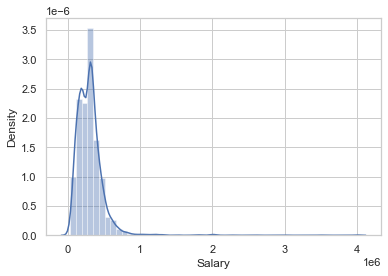

In [45]:
sns.distplot(df.Salary)

Salary is tailed on the right hand side

In [46]:
# clearly data is not normlly distributted it looks skewed on positive side
df.Salary.skew() # data is +ve skewed


6.451081166224832

In [47]:
df.Salary.kurtosis() 

80.92999627162538

<AxesSubplot:xlabel='Salary'>

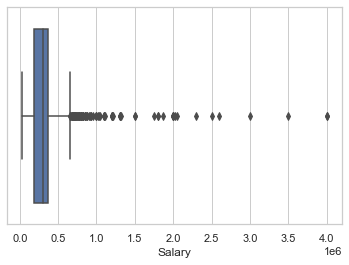

In [48]:
sns.boxplot(df.Salary)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([  35000,   35000,   35000, ..., 3500000, 4000000, 4000000],
        dtype=int64)),
 (169575.8590332032, 307699.8499249625, 0.7965631961608539))

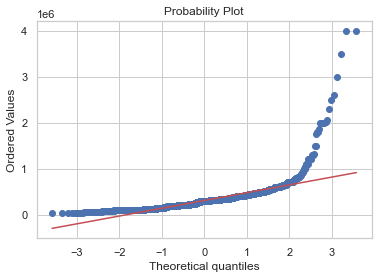

In [49]:
#Checking Normality with QQ Plot

stats.probplot(df.Salary,dist='norm',plot= plt)



From the plots we can say that data is not normly distributed and it is skewed one side

In [50]:
#Let's try to find outlayers

def Upper_lower_limites(col_name):
    Q1 = np.percentile(col_name,25)
    Q3 =  np.percentile(col_name,75)
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return(UL,LL)

In [51]:
stats.iqr(df.Salary)

190000.0

In [52]:
UL,LL = Upper_lower_limites(df.Salary)

In [53]:
UL,LL

(655000.0, -105000.0)

In [54]:
df[(df.Salary<LL)|(df.Salary>UL)] #outlayers in the data

,Salary,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge
3,1100000,senior software engineer,Gurgaon,m,85.60,cbse,83.60,cbse,6920,1,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4,26,18,22
76,800000,software engineer,Bangalore,m,93.44,karnataka state board,90.00,karnataka state board,1384,2,...,-1,-0.4173,0.9688,-0.1988,-0.29020,0.3049,3,24,17,21
92,1500000,application developer,Hyderabad,m,79.00,state board,87.90,state board,9557,2,...,-1,0.4155,0.5454,0.9322,-0.61470,0.8637,0,22,17,21
123,1200000,engineer trainee,Maharajganj,m,59.80,icse,60.25,isc,5690,2,...,-1,0.2009,1.1248,1.1074,-1.11280,0.9763,1,23,18,22
128,675000,senior software engineer,Noida,m,60.00,0,59.00,0,144,2,...,-1,-0.8810,-0.2793,-0.6343,-0.64280,-2.9731,4,27,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,775000,mechanical design engineer,Dammam,m,87.40,cbse,63.00,cbse,11973,1,...,-1,-0.8772,-0.1206,-0.1437,-0.23440,-0.0943,1,24,17,22
3904,850000,operations assistant,Noida,m,83.40,cbse,78.00,cbse,7564,2,...,-1,-0.8810,0.1888,-0.1988,-0.05520,-1.0774,4,26,18,22
3912,730000,research scientist,Pune,m,84.67,0,86.46,0,264,1,...,-1,-1.3447,-1.0593,0.6720,1.00240,-1.7093,2,26,17,22
3961,700000,planning engineer,Rajpura,m,84.20,0,69.20,0,64,2,...,460,-1.3447,0.0328,-2.3759,-0.99530,0.3444,3,27,19,24


In [55]:
(df[(df.Salary<LL)|(df.Salary>UL)].shape[0]/df.Salary.shape[0])*100

2.7263631815907954

**In salary column 2.7% of the data contain the outlayers**

In [56]:
df[(df.Salary<LL)|(df.Salary>UL)].index

Int64Index([   3,   76,   92,  123,  128,  166,  177,  296,  328,  331,
            ...
            3607, 3652, 3675, 3710, 3733, 3823, 3904, 3912, 3961, 3992],
           dtype='int64', length=109)

In [57]:
designation= list(df['Designation'])

In [58]:
len(designation)

3998

In [59]:
count = []
for i in range(len(designation)):
      count.append(designation.count(designation[i]))

In [60]:
designation

['senior quality engineer',
 'assistant manager',
 'systems engineer',
 'senior software engineer',
 'get',
 'system engineer',
 'java software engineer',
 'mechanical engineer',
 'electrical engineer',
 'project engineer',
 'senior php developer',
 'senior systems engineer',
 'quality assurance engineer',
 'qa analyst',
 'java software engineer',
 'network engineer',
 'product development engineer',
 'associate software developer',
 'data entry operator',
 'software engineer',
 'software engineer',
 'software engineer',
 'developer',
 'electrical project engineer',
 'programmer analyst',
 'systems analyst',
 'senior software engineer',
 'ase',
 'telecommunication engineer',
 'java software engineer',
 'systems engineer',
 'software engineer',
 'application developer',
 'ios developer',
 'executive assistant',
 'online marketing manager',
 'software engineer',
 'documentation specialist',
 'associate software engineer',
 'management trainee',
 'site manager',
 'software developer',
 'a

In [61]:
count

[5,
 52,
 118,
 72,
 14,
 205,
 111,
 7,
 23,
 77,
 4,
 35,
 14,
 29,
 111,
 51,
 13,
 4,
 3,
 539,
 539,
 539,
 2,
 9,
 139,
 11,
 72,
 3,
 1,
 111,
 118,
 539,
 52,
 13,
 4,
 3,
 539,
 1,
 46,
 19,
 5,
 265,
 46,
 34,
 139,
 29,
 3,
 265,
 539,
 29,
 1,
 5,
 539,
 23,
 46,
 539,
 17,
 57,
 77,
 539,
 539,
 67,
 47,
 19,
 111,
 205,
 205,
 57,
 1,
 265,
 205,
 111,
 76,
 46,
 49,
 139,
 539,
 57,
 205,
 265,
 3,
 2,
 13,
 17,
 100,
 2,
 33,
 265,
 11,
 77,
 15,
 17,
 52,
 539,
 36,
 118,
 539,
 265,
 35,
 3,
 49,
 23,
 539,
 29,
 76,
 23,
 52,
 46,
 54,
 22,
 29,
 35,
 8,
 539,
 139,
 539,
 205,
 265,
 52,
 539,
 539,
 51,
 111,
 4,
 139,
 139,
 29,
 3,
 72,
 34,
 539,
 205,
 25,
 3,
 118,
 20,
 18,
 539,
 1,
 47,
 23,
 4,
 54,
 77,
 47,
 100,
 111,
 17,
 54,
 265,
 33,
 539,
 8,
 49,
 5,
 9,
 9,
 205,
 118,
 26,
 25,
 52,
 17,
 139,
 14,
 54,
 3,
 205,
 539,
 72,
 539,
 118,
 12,
 6,
 265,
 539,
 13,
 20,
 265,
 6,
 28,
 67,
 539,
 28,
 118,
 9,
 11,
 139,
 265,
 111,
 46,
 2,
 77,
 

In [62]:
len(count)

3998

In [63]:
for i in range(len(count)):
     if (count[i]<15)==True:
        designation[i] ='other'

In [64]:
df['designation'] = designation

In [65]:
df['designation'].value_counts()

other                                1123
software engineer                     539
software developer                    265
system engineer                       205
programmer analyst                    139
systems engineer                      118
java software engineer                111
software test engineer                100
project engineer                       77
technical support engineer             76
senior software engineer               72
java developer                         67
test engineer                          57
web developer                          54
assistant manager                      52
application developer                  52
network engineer                       51
data analyst                           49
business analyst                       49
engineer                               47
android developer                      46
associate software engineer            46
programmer                             36
senior systems engineer           

<AxesSubplot:>

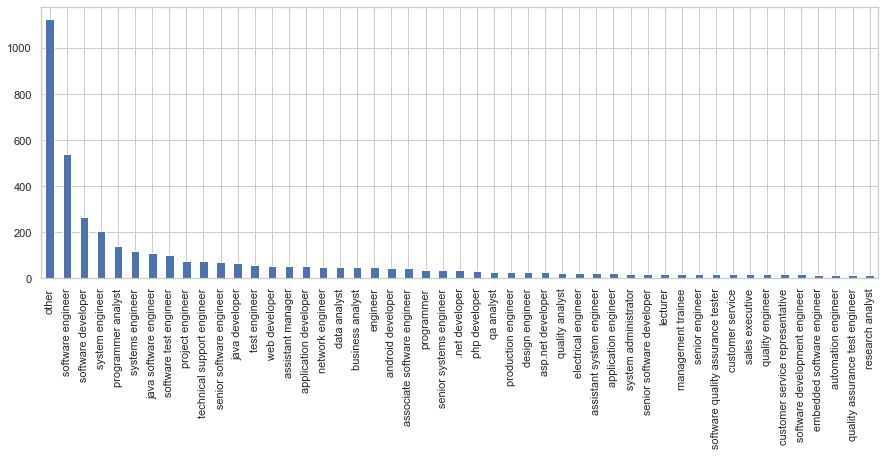

In [66]:
plt.figure(figsize=(15,5))
df['designation'].value_counts().plot(kind='bar')


The software enginners are more in the Data

In [67]:
pd.DataFrame(df.designation.value_counts()).head(15)

,designation
other,1123
software engineer,539
software developer,265
system engineer,205
programmer analyst,139
systems engineer,118
java software engineer,111
software test engineer,100
project engineer,77
technical support engineer,76


Software engineer, software developer,system engineer are more in the data

In [68]:
df.drop(['Designation'],axis=1, inplace = True)

In [69]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experinace', 'age', '12GradAge', 'GradAge',
       'designation'],
      dtype='object')

In [70]:
pd.DataFrame(df.JobCity.value_counts())

,JobCity
Bangalore,627
-1,461
Noida,368
Hyderabad,335
Pune,290
...,...
BANGALORE,1
Manesar,1
Joshimath,1
Miryalaguda,1


In [71]:
df.JobCity.isnull().sum()

0

In [72]:
df.JobCity.value_counts()

Bangalore      627
-1             461
Noida          368
Hyderabad      335
Pune           290
              ... 
BANGALORE        1
Manesar          1
Joshimath        1
Miryalaguda      1
angul            1
Name: JobCity, Length: 339, dtype: int64

In [73]:
df.JobCity.replace(-1,'',inplace=True)

In [74]:
df.JobCity.value_counts()

Bangalore      627
               461
Noida          368
Hyderabad      335
Pune           290
              ... 
karnal           1
Jaipur           1
Chandigarh       1
Rohtak           1
angul            1
Name: JobCity, Length: 339, dtype: int64

In [75]:
for i in df.JobCity:
    df.JobCity.replace(i,i.lower(),inplace=True)

In [76]:
df.JobCity.value_counts()

bangalore                647
                         461
noida                    386
hyderabad                357
pune                     320
                        ... 
muzaffarnagar              1
new delhi - jaisalmer      1
pondy                      1
jalandhar                  1
delhi/ncr                  1
Name: JobCity, Length: 262, dtype: int64

In [77]:
index = df.JobCity.value_counts().index

In [78]:
index

Index(['bangalore', '', 'noida', 'hyderabad', 'pune', 'chennai', 'gurgaon',
       'new delhi', 'kolkata', 'mumbai',
       ...
       'ambala city', 'bharuch', 'tirupati', 'bhagalpur', 'bikaner',
       'muzaffarnagar', 'new delhi - jaisalmer', 'pondy', 'jalandhar',
       'delhi/ncr'],
      dtype='object', length=262)

In [79]:
jobCity = df.JobCity

In [80]:
for i in index:
    print(i)

bangalore

noida
hyderabad
pune
chennai
gurgaon
new delhi
kolkata
mumbai
jaipur
lucknow
mysore
navi mumbai
greater noida
chandigarh
bhubaneswar
indore
coimbatore
delhi
ahmedabad
bhopal
faridabad
bangalore 
ghaziabad
mohali
banglore
kochi/cochin
hyderabad 
mangalore
dehradun
trivandrum
bhubaneshwar
nagpur
kanpur
chennai 
thiruvananthapuram
gurgaon 
visakhapatnam
patna
jabalpur
thane
pune 
pondicherry
raipur
bengaluru
jodhpur
trichy
gurgoan
udaipur
bhubneshwar
meerut
nasikcity
madurai
rudrapur
 mumbai
noida 
dubai
haridwar
secunderabad
bilaspur
ludhiana
aurangabad
nashik
tirupathi
vizag
ranchi
mumbai 
kota
neemrana
pilani
jamshedpur
new delhi 
beawar
agra
hissar
mysore 
nagpur 
ongole
hubli
dhanbad
karnal
chandrapur
nalagarh
panchkula
kochi
vijayawada
ahmednagar
jamnagar
belgaum
gandhinagar
gandhi nagar
rajkot
ambala
unnao
manesar
sonipat
pantnagar
sambalpur
vadodara
shahdol
kharagpur
rourkela
jeddah saudi arabia
kala amb 
siliguri 
raigarh
hyderabad(bhadurpally)
bareli
bahadurgarh
chenn

In [81]:
import re

In [82]:
for i in df.JobCity:
        if re.findall('delhi',i) == ['delhi']:
            df.JobCity.replace(i,'delhi',inplace= True)

In [83]:
for i in df.JobCity:
        if re.findall('noida',i) == ['noida']:
            df.JobCity.replace(i,'noida',inplace= True)

In [84]:
for i in df.JobCity:
        if re.findall('hyderabad',i) == ['hyderabad']:
            df.JobCity.replace(i,'hyderabad',inplace= True)

In [85]:
for i in df.JobCity:
        if re.findall('mumbai',i) == ['mumbai']:
            df.JobCity.replace(i,'mumbai',inplace= True)

In [86]:
for i in df.JobCity:
        if re.findall('chennai',i) == ['chennai']:
            df.JobCity.replace(i,'chennai',inplace= True)

In [87]:
df.JobCity.unique()    

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '', 'mohali',
       'jhansi', 'delhi', 'bangalore ', 'bhubaneswar', 'mumbai',
       'mangalore', 'rewari', 'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'jaipur', 'thane', 'maharajganj', 'thiruvananthapuram',
       'punchkula', 'bhubaneshwar', 'pune ', 'coimbatore', 'dhanbad',
       'lucknow', 'trivandrum', 'gandhi nagar', 'una', 'daman and diu',
       'gurgoan', 'vsakhapttnam', 'nagpur', 'bhagalpur', 'ahmedabad',
       'kochi/cochin', 'bankura', 'bengaluru', 'mysore ', 'kanpur ',
       'gurgaon ', 'vijayawada', 'kochi', 'beawar', 'alwar', 'siliguri ',
       'raipur', 'bhopal', 'faridabad', 'jodhpur', 'udaipur',
       'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar', 'raigarh',
       'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad', 'belgaum',
       'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharamshala', 'banagalore', 'h

In [88]:
for i in df.JobCity:
    df.JobCity.replace('secunderabad','hyderabad',inplace = True)

In [89]:
for i in df.JobCity:
    df.JobCity.replace('thiruvananthapuram','trivandrum',inplace = True)

In [90]:
for i in df.JobCity:
    df.JobCity.replace(['bangalore','banglore','bangalore','mangalore','bengaluru','bangalore ' ,' bangalore'],'bangalore',inplace = True)

In [91]:
df.JobCity.value_counts()

bangalore    694
             461
noida        419
hyderabad    373
pune         320
            ... 
guwahati       1
kolkata        1
jaspur         1
shimla         1
banaglore      1
Name: JobCity, Length: 236, dtype: int64

In [92]:
jobCity = list(df['JobCity'])

In [93]:
jobCity

['bangalore',
 'indore',
 'chennai',
 'gurgaon',
 'manesar',
 'hyderabad',
 'bangalore',
 'bangalore',
 'noida',
 'kolkata',
 'bangalore',
 'pune',
 'pune',
 'gurgaon',
 'bangalore',
 '',
 'noida',
 'gurgaon',
 'gurgaon',
 'pune',
 'bangalore',
 '',
 'hyderabad',
 'bangalore',
 'hyderabad',
 'gurgaon',
 'bangalore',
 'bangalore',
 'noida',
 'gurgaon',
 'hyderabad',
 'bangalore',
 'noida',
 'kolkata',
 'bangalore',
 'mohali',
 'hyderabad',
 'gurgaon',
 'bangalore',
 '',
 'jhansi',
 'delhi',
 'bangalore',
 'hyderabad',
 'bangalore',
 'chennai',
 'noida',
 'delhi',
 'bangalore',
 'bangalore',
 'bhubaneswar',
 'hyderabad',
 'mumbai',
 'mumbai',
 'delhi',
 'bangalore',
 'rewari',
 'hyderabad',
 'gaziabaad',
 'bangalore',
 'chennai',
 'chennai',
 'noida',
 'bhiwadi',
 'gurgaon',
 'mysore',
 'bangalore',
 'bangalore',
 'chennai',
 'bangalore',
 'chennai',
 'rajkot',
 'bangalore',
 'noida',
 'indore',
 'bangalore',
 'bangalore',
 '',
 'mysore',
 '',
 'bangalore',
 'delhi',
 'delhi',
 'jaipur',

In [94]:
jobCity.count('asifabadbanglore')

1

In [95]:
count= []
for i in jobCity:
    count.append(jobCity.count(i))

In [96]:
len(count)

3998

In [97]:
for i in range(len(count)):
     if (count[i]<15)==True:
        jobCity[i] ='other'

While seeing the graph and value counts most of the people are living in the metropolitan citys

In [98]:
jobCity

['bangalore',
 'indore',
 'chennai',
 'gurgaon',
 'other',
 'hyderabad',
 'bangalore',
 'bangalore',
 'noida',
 'kolkata',
 'bangalore',
 'pune',
 'pune',
 'gurgaon',
 'bangalore',
 '',
 'noida',
 'gurgaon',
 'gurgaon',
 'pune',
 'bangalore',
 '',
 'hyderabad',
 'bangalore',
 'hyderabad',
 'gurgaon',
 'bangalore',
 'bangalore',
 'noida',
 'gurgaon',
 'hyderabad',
 'bangalore',
 'noida',
 'kolkata',
 'bangalore',
 'other',
 'hyderabad',
 'gurgaon',
 'bangalore',
 '',
 'other',
 'delhi',
 'bangalore',
 'hyderabad',
 'bangalore',
 'chennai',
 'noida',
 'delhi',
 'bangalore',
 'bangalore',
 'bhubaneswar',
 'hyderabad',
 'mumbai',
 'mumbai',
 'delhi',
 'bangalore',
 'other',
 'hyderabad',
 'other',
 'bangalore',
 'chennai',
 'chennai',
 'noida',
 'other',
 'gurgaon',
 'mysore',
 'bangalore',
 'bangalore',
 'chennai',
 'bangalore',
 'chennai',
 'other',
 'bangalore',
 'noida',
 'indore',
 'bangalore',
 'bangalore',
 '',
 'mysore',
 '',
 'bangalore',
 'delhi',
 'delhi',
 'jaipur',
 'pune',
 '

In [99]:
df['JobCity'] = jobCity

In [100]:
pd.DataFrame(df.JobCity.value_counts())

,JobCity
bangalore,694
,461
noida,419
other,392
hyderabad,373
pune,320
chennai,315
delhi,227
gurgaon,210
mumbai,154


In [101]:
df.JobCity.replace('',np.NaN,inplace= True)

In [102]:
df.JobCity.value_counts()

bangalore      694
noida          419
other          392
hyderabad      373
pune           320
chennai        315
delhi          227
gurgaon        210
mumbai         154
kolkata        118
jaipur          52
lucknow         40
mysore          38
chandigarh      27
bhubaneswar     26
indore          25
coimbatore      21
bhopal          18
faridabad       18
ahmedabad       18
trivandrum      16
ghaziabad       16
Name: JobCity, dtype: int64

In [103]:
df.JobCity.fillna('other',axis=0,inplace=True)

<AxesSubplot:>

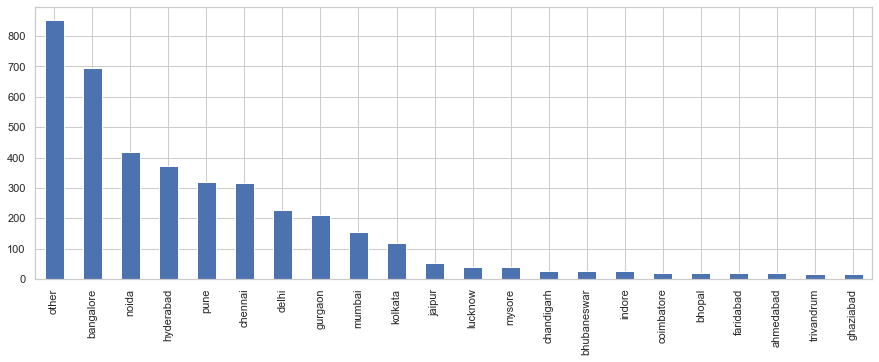

In [104]:
df.JobCity.value_counts().plot(kind='bar',figsize=(15,5))


The Peope who are doing the job are mostly staying in bangalore 

In [105]:
pd.DataFrame(df.Gender.value_counts())

,Gender
m,3041
f,957


In [106]:
(df.Gender.value_counts()/df.shape[0])*100

m    76.063032
f    23.936968
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

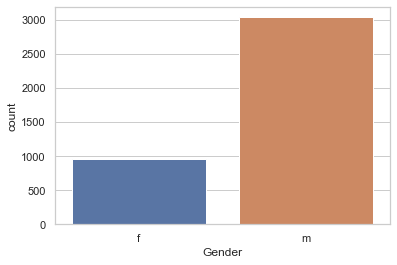

In [107]:
sns.countplot(df.Gender)

In the given data 76% of people are male

In [108]:
df['10percentage'].describe()   # tells you basic stastics about the data

count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

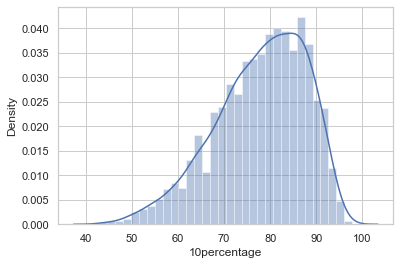

In [109]:
sns.distplot(df['10percentage'])

On observing the above histogram we can see that among all Job holders in india most of students have got the average marks of around 60-92 percentage



In [110]:
df['10percentage'].median()

79.15

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([43.  , 44.  , 44.16, ..., 97.  , 97.12, 97.76])),
 (9.70872447318805, 77.9254427213607, 0.9849610281651758))

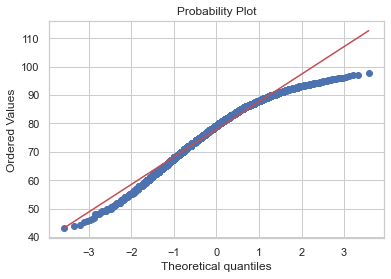

In [111]:
stats.probplot(df['10percentage'],plot= plt)

Data is not normally distributed

<AxesSubplot:xlabel='10percentage'>

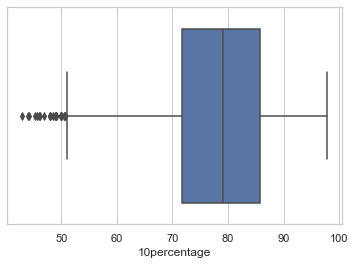

In [112]:
sns.boxplot(df['10percentage'])

There are some outliers in the data

In [113]:
Upper_lower_limites(df['10percentage'])

(106.65500000000002, 50.69499999999998)

In [114]:
UL,LL = Upper_lower_limites(df['10percentage'])

In [115]:
df[(df['10percentage']<LL)|(df['10percentage']>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation
245,285000,jaipur,m,50.60,cbse,56.90,state board,4948,2,B.Tech/B.E.,...,-0.0154,0.2124,-0.1437,-1.24860,1.2470,1,24,18,23,technical support engineer
466,215000,delhi,m,44.16,state board,62.00,state board,51,2,MCA,...,0.2718,0.8784,0.0100,-0.10760,0.4805,0,26,20,26,software developer
490,150000,pune,m,44.00,central board of secondary education,74.00,diploma in engg (e &tc) tilak maharashtra vida...,5846,2,B.Tech/B.E.,...,-0.5100,0.0328,0.6984,-0.56440,0.6603,1,23,19,22,design engineer
491,100000,other,m,45.60,bse,73.60,chse,1268,2,MCA,...,0.6646,0.3448,-1.0697,0.29730,-0.9194,1,24,20,23,software developer
502,240000,delhi,m,48.00,state board,51.40,state board,8195,1,B.Tech/B.E.,...,-0.5236,-1.1196,0.1637,0.01920,-1.0872,0,25,18,25,other
600,200000,trivandrum,m,49.00,state board,63.00,state board,11476,2,M.Tech./M.E.,...,-1.1644,-1.9521,-1.0659,0.52620,-1.4356,4,26,17,28,project engineer
613,440000,other,m,48.00,cbse,66.66,up board,23,2,B.Tech/B.E.,...,0.0464,0.6568,-0.0537,-0.05520,0.6603,2,27,19,23,other
898,270000,noida,m,49.00,up,52.00,up,5690,2,B.Tech/B.E.,...,-0.8810,-1.5273,-0.3440,0.53230,-0.9194,2,26,16,22,asp.net developer
919,450000,bangalore,f,48.80,state board,48.80,0,2318,2,B.Tech/B.E.,...,0.9900,0.3789,1.0859,0.65300,0.4805,1,26,16,25,system engineer
1064,250000,delhi,m,49.00,0,54.00,0,75,2,MCA,...,0.8192,0.1888,-0.3440,-0.76030,0.8183,3,27,18,24,.net developer


In [116]:
df[(df['10percentage']<LL)|(df['10percentage']>UL)].shape

(30, 36)

In [117]:
# there are 30 outliers in the data

In [118]:
pd.DataFrame(df['10board'].value_counts())

,10board
cbse,1395
state board,1164
0,350
icse,281
ssc,122
...,...
west bengal board of secondary examination (wbbse),1
up bourd,1
"bright way college, (up board)",1
cbse[gulf zone],1


In [119]:
cbse=['cbse', 'all india board', 'central board of secondary education', 'new delhi', 'cbese',['central board of secondary education', 'new delhi']]
icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse', 'isc board , new delhi','icse board',['icse board , new delhi']]



In [120]:
for i in df['10board']:
    if i in cbse:
        df['10board'].replace(i,'cbse',inplace=True)
    elif i in icse:
        df['10board'].replace(i,'icse',inplace=True)
    elif i is not 0:
        df['10board'].replace(i,'State',inplace=True)
    
        

In [121]:
df['10board'].replace(0,np.NaN,inplace=True)

In [122]:
df['10board'].value_counts()

State    1957
cbse     1408
icse      283
Name: 10board, dtype: int64

<AxesSubplot:xlabel='10board', ylabel='count'>

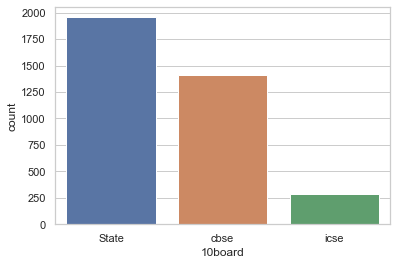

In [123]:
sns.countplot(df['10board'])

From the graph we can say that the people who completed their 10th graduaction in school are High 

In [124]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experinace', 'age', '12GradAge', 'GradAge',
       'designation'],
      dtype='object')

In [125]:
df['12board'].value_counts()

cbse                                            1400
state board                                     1254
0                                                359
icse                                             129
up board                                          87
                                                ... 
state board of karnataka                           1
ua                                                 1
department of technical education, bangalore       1
board of intrmediate education,ap                  1
diploma(msbte)                                     1
Name: 12board, Length: 340, dtype: int64

In [126]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [127]:
cbse=['cbse', 'all india board', 'central board of secondary education', 'new delhi', 'cbese',['central board of secondary education', 'new delhi'],['cbse','new delhi']]
icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse', 'isc board , new delhi','icse board',['icse board , new delhi']]


In [128]:
for i in df['12board']:
    if i in cbse:
        df['12board'].replace(i,'cbse',inplace=True)
    elif i in icse:
        df['12board'].replace(i,'icse',inplace=True)
    elif i is not 0 :
        df['12board'].replace(i,'State',inplace=True)

In [129]:
df['12board'].value_counts()

State    2047
cbse     1414
0         359
icse      178
Name: 12board, dtype: int64

In [130]:
df['12board'].replace(0,np.NaN,inplace=True)

<AxesSubplot:xlabel='12board', ylabel='count'>

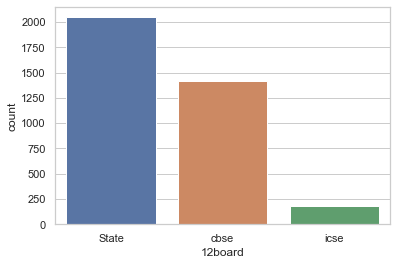

In [131]:
sns.countplot(df['12board'])

From the graph we can say that the people who completed their 10th graduaction in school are High 

In [132]:
pd.DataFrame(df.CollegeID.value_counts())

,CollegeID
272,94
64,38
11759,35
44,35
47,33
...,...
5653,1
7547,1
13209,1
15735,1


CollegeID : Unique ID identifying the college which the candidate attended

Highest number of students attended 272 collage id 

In [133]:
df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

In [134]:
(df['CollegeTier'].value_counts()/df.shape[0])*100   #In percentage

2    92.571286
1     7.428714
Name: CollegeTier, dtype: float64

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

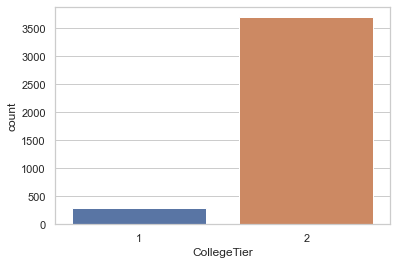

In [135]:
sns.countplot(df['CollegeTier'])

92% people are belongs to tier 2 Colleges

In [136]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [137]:
(df['Degree'].value_counts()/df['Degree'].shape[0])*100    # In percentage

B.Tech/B.E.      92.546273
MCA               6.078039
M.Tech./M.E.      1.325663
M.Sc. (Tech.)     0.050025
Name: Degree, dtype: float64

<AxesSubplot:xlabel='Degree', ylabel='count'>

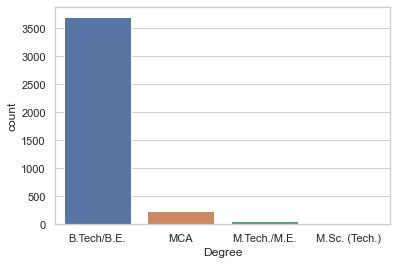

In [138]:
sns.countplot(df['Degree'])

Most of the people are from B.Tech/B.E background **(92.5%)**

In [139]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experinace', 'age', '12GradAge', 'GradAge',
       'designation'],
      dtype='object')

In [140]:
specialization_freq  =df['Specialization'].value_counts()

<AxesSubplot:>

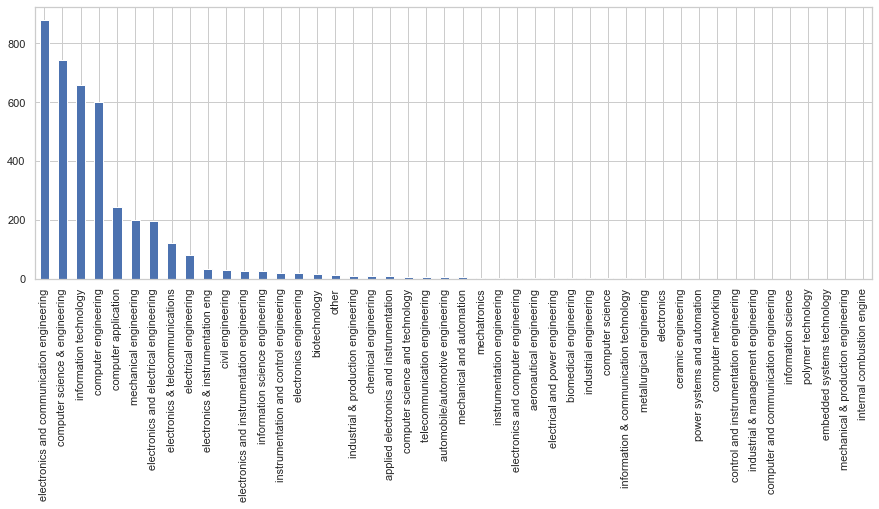

In [141]:
specialization_freq.plot(kind='bar', figsize=(15,5))


In [142]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}


In [143]:
df['specialization'] = df['Specialization'].map(specialization_map)



In [144]:
df['specialization'].value_counts()

CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: specialization, dtype: int64

In [145]:
(df['specialization'].value_counts()/df.shape[0])*100

CS       57.253627
EC       32.991496
ME        5.502751
EL        2.126063
other     1.400700
CE        0.725363
Name: specialization, dtype: float64

<AxesSubplot:xlabel='specialization', ylabel='count'>

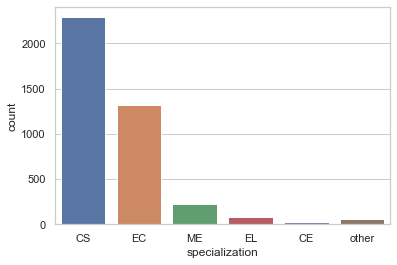

In [146]:
sns.countplot(df['specialization'])

Most of the people are from the below Specialization

1. 57% of the people are from computer background    
2. 32% of the people are from electical background                 
                        

In [147]:
df.drop(['Specialization'],axis=1,inplace = True)

In [148]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

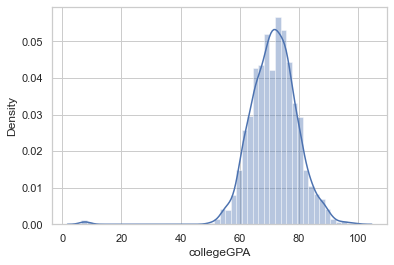

In [149]:
sns.distplot(df['collegeGPA'])

On observing the above histogram we can see that among all engineering graduates in india most of students have got the average marks of around 60-90 percentage



Looks like data is right skewed

In [150]:
[i for i in df['collegeGPA'] if i<0 ]

[]

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([ 6.45,  6.63,  6.8 , ..., 98.4 , 99.  , 99.93])),
 (7.858204538506846, 71.48617058529265, 0.9614862556043504))

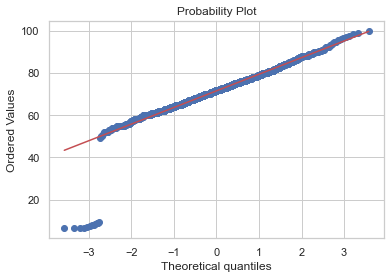

In [151]:
stats.probplot(df['collegeGPA'],plot=plt)

<AxesSubplot:xlabel='collegeGPA'>

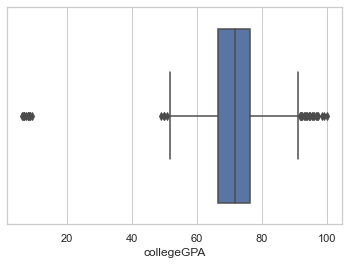

In [152]:
sns.boxplot(df['collegeGPA'])

In [153]:
Upper_lower_limites(df['collegeGPA'])

(91.20750000000001, 51.527499999999996)

In [154]:
UL,LL  = Upper_lower_limites(df['collegeGPA'])

In [155]:
df[(df['collegeGPA']<LL)|(df['collegeGPA']>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
7,400000,bangalore,m,92.00,cbse,91.00,cbse,1757,1,B.Tech/B.E.,...,1.2114,0.0100,0.14590,1.2470,1,23,18,24,other,ME
44,380000,bangalore,f,84.50,NaN,82.50,NaN,3461,2,B.Tech/B.E.,...,0.6568,-0.6343,0.29730,0.1864,3,26,18,22,programmer analyst,CS
138,195000,coimbatore,m,79.60,State,87.58,NaN,7586,2,B.Tech/B.E.,...,0.7119,0.4711,1.16010,0.4805,1,24,20,23,other,CS
187,410000,hyderabad,m,91.50,NaN,95.50,NaN,3076,2,B.Tech/B.E.,...,1.1248,0.5269,0.00353,0.1864,2,25,18,22,programmer analyst,CS
477,225000,chennai,m,89.00,NaN,96.70,NaN,6659,2,B.Tech/B.E.,...,-0.4353,0.6720,1.85433,-0.1295,2,24,17,21,other,EC
614,655000,bangalore,m,88.50,icse,85.40,cbse,5671,2,B.Tech/B.E.,...,0.6568,-0.9245,-0.40780,0.8183,4,26,18,22,senior software engineer,EC
690,440000,gurgaon,f,83.16,icse,77.00,cbse,10950,1,M.Tech./M.E.,...,-0.6201,-0.7585,-0.99500,-0.2859,2,26,18,24,software developer,EC
788,180000,other,m,66.50,cbse,65.50,cbse,272,2,M.Tech./M.E.,...,-0.2793,-1.0697,0.17980,-1.0774,1,24,18,26,other,EL
874,400000,chennai,m,83.82,State,92.67,State,3076,2,B.Tech/B.E.,...,0.9688,0.8171,-1.23027,-0.1295,2,24,17,21,programmer analyst,CS
907,100000,pune,m,63.00,NaN,80.00,NaN,993,2,B.Tech/B.E.,...,-0.4353,-0.1988,1.50180,-1.2354,1,25,20,23,production engineer,EC


In [156]:
df[(df['collegeGPA']<LL)|(df['collegeGPA']>UL)].shape

(38, 36)

There are 38 outliers in the collegeGPA Data

In [157]:
df.CollegeID.value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
5653      1
7547      1
13209     1
15735     1
6143      1
Name: CollegeID, Length: 1350, dtype: int64

In [158]:
df['CollegeCityID'].value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
5653      1
7547      1
13209     1
15735     1
6143      1
Name: CollegeCityID, Length: 1350, dtype: int64

A unique ID to identify the city in which the college is located in

 Most odf the people are from the CollegeCityID 272

In [159]:
df.CollegeCityTier.value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

In [160]:
(df.CollegeCityTier.value_counts()/df.shape[0])*100

0    69.95998
1    30.04002
Name: CollegeCityTier, dtype: float64

CollegeCityTier :The tier of the city in which the college is located

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

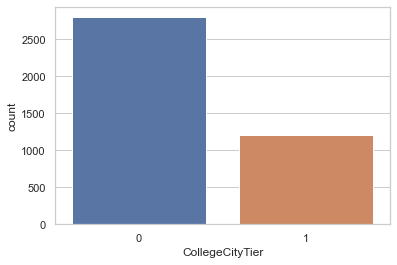

In [161]:
sns.countplot(df.CollegeCityTier)

70% 0f the collages are located in 0 City Tier

In [162]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [163]:
df.CollegeState.value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

<AxesSubplot:xlabel='CollegeState', ylabel='count'>

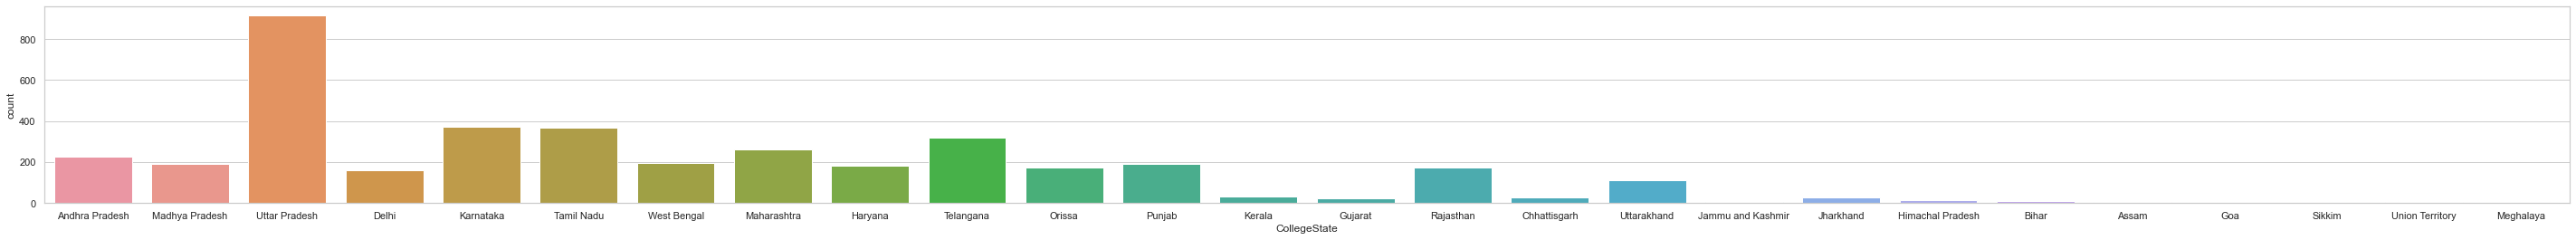

In [164]:
plt.figure(figsize=(50,4))
sns.countplot(df['CollegeState'])

In [165]:
(df.CollegeState.value_counts()/df.shape[0])*100

Uttar Pradesh        22.886443
Karnataka             9.254627
Tamil Nadu            9.179590
Telangana             7.978989
Maharashtra           6.553277
Andhra Pradesh        5.627814
West Bengal           4.902451
Punjab                4.827414
Madhya Pradesh        4.727364
Haryana               4.502251
Rajasthan             4.352176
Orissa                4.302151
Delhi                 4.052026
Uttarakhand           2.826413
Kerala                0.825413
Jharkhand             0.700350
Chhattisgarh          0.675338
Gujarat               0.600300
Himachal Pradesh      0.400200
Bihar                 0.250125
Jammu and Kashmir     0.175088
Assam                 0.125063
Union Territory       0.125063
Sikkim                0.075038
Meghalaya             0.050025
Goa                   0.025013
Name: CollegeState, dtype: float64

Highest number of people are from the Uttar Pradesh(23%)

In [166]:
df['English'].value_counts()

475    160
545    151
465    150
535    138
485    111
      ... 
255      1
825      1
775      1
795      1
180      1
Name: English, Length: 111, dtype: int64

In [167]:
df['English'].describe()

count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

In [168]:
df['English'].median()

500.0

English: Scores in AMCAT English section

<AxesSubplot:xlabel='English', ylabel='Density'>

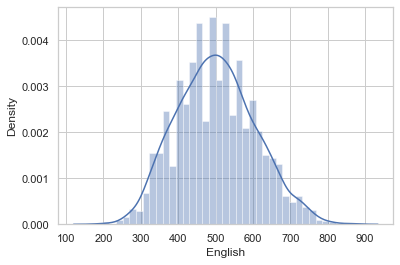

In [169]:
sns.distplot(df['English'])

On observing the above histogram we can see that people  average marks in english of around 350 to 650 Marks



((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([180, 205, 215, ..., 850, 870, 875], dtype=int64)),
 (104.7859439236227, 501.64907453726863, 0.9978428414654276))

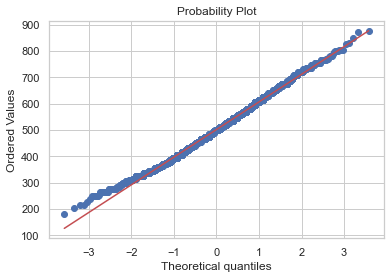

In [170]:
stats.probplot(df['English'],plot=plt)

Mostly data is normally distributed

<AxesSubplot:xlabel='English'>

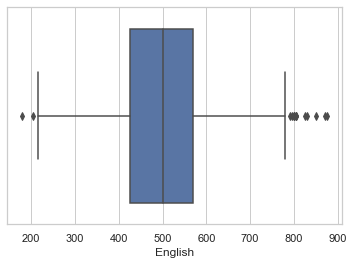

In [171]:
sns.boxplot(df['English'])

There are some outliers in the data

In [172]:
Upper_lower_limites(df['English'])

(787.5, 207.5)

In [173]:
UL,LL = Upper_lower_limites(df['English'])

In [174]:
df[(df['English']<LL)|(df['English']>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
275,305000,other,m,88.6,State,92.0,State,14342,2,B.Tech/B.E.,...,0.3789,0.1637,0.0192,0.2889,1,22,17,21,software engineer,CS
444,715000,other,m,70.0,icse,73.8,icse,4234,2,B.Tech/B.E.,...,0.8128,1.2525,0.8848,0.5024,3,26,17,22,senior engineer,CS
668,440000,other,f,87.6,cbse,80.0,cbse,285,1,B.Tech/B.E.,...,0.0459,-0.6048,1.9207,0.6721,2,24,18,22,software engineer,EC
839,315000,mumbai,m,78.8,cbse,71.6,State,4971,2,B.Tech/B.E.,...,1.2114,0.1637,-0.9950,0.4805,2,26,19,24,other,EC
847,600000,gurgaon,m,86.4,cbse,93.6,cbse,10950,1,B.Tech/B.E.,...,-1.1196,-0.7585,-0.2344,-0.4776,1,23,18,22,other,ME
935,150000,other,m,70.0,State,56.6,State,11637,2,B.Tech/B.E.,...,0.3448,-0.6343,-0.2609,-0.2875,1,23,18,22,asp.net developer,CS
1183,310000,other,m,82.1,State,72.1,State,13697,2,B.Tech/B.E.,...,-0.4536,-1.6807,0.3995,-1.2440,1,23,18,22,quality assurance test engineer,EC
1217,600000,kolkata,m,73.0,State,71.0,State,9699,2,B.Tech/B.E.,...,-1.9521,-2.6028,0.0192,-2.5853,1,23,17,21,assistant manager,CS
1450,200000,other,f,90.6,cbse,78.8,cbse,6874,2,B.Tech/B.E.,...,0.8784,0.7785,-1.3753,0.4805,0,23,18,23,other,CS
1519,320000,delhi,m,92.4,icse,74.0,cbse,387,2,B.Tech/B.E.,...,-0.1206,1.3933,-0.4879,0.6721,1,23,18,23,software engineer,EC


There are 15 outliers in the df['English'] data

In [175]:
df['Logical'].value_counts()

495    158
485    151
545    151
555    151
505    117
      ... 
534      1
660      1
674      1
235      1
240      1
Name: Logical, Length: 107, dtype: int64

In [176]:
df['Logical'].describe()

count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

In [177]:
df['Logical'].median()

505.0

<AxesSubplot:xlabel='Logical', ylabel='Density'>

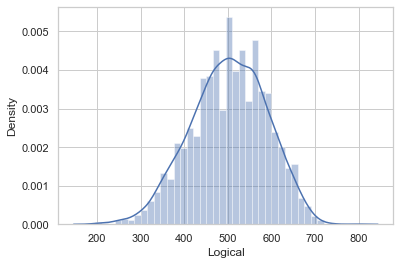

In [178]:
sns.distplot(df['Logical'])

On observing the above histogram we can see that Marks in  Logical testaverage  around 350 to 650 


((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([195, 205, 205, ..., 735, 735, 795], dtype=int64)),
 (86.62984490164085, 501.59879939969983, 0.9975430654717725))

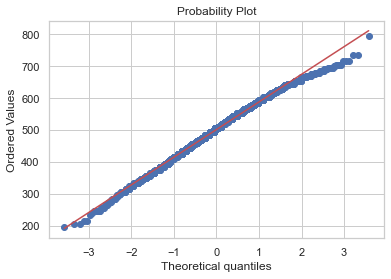

In [179]:
stats.probplot(df['Logical'],plot=plt)

In [180]:
df.Logical.skew()

-0.21660181091305136

In [181]:
df.Logical.kurtosis()

-0.2247605173210978

Looks Data is normally distributed with some deveations

<AxesSubplot:xlabel='Logical'>

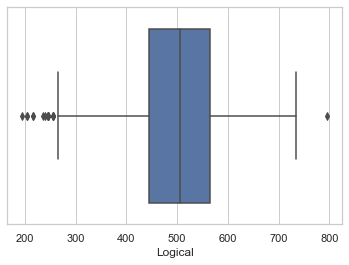

In [182]:
sns.boxplot(df.Logical)

In [183]:
Upper_lower_limites(df.Logical)

(745.0, 265.0)

In [184]:
df[(df.Logical<LL)|(df.Logical>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
133,300000,other,m,89.80,NaN,66.6,NaN,3054,2,B.Tech/B.E.,...,-0.2793,0.9623,1.11990,0.1864,1,26,18,23,other,EC
1014,350000,pune,m,80.53,State,80.5,State,8743,2,B.Tech/B.E.,...,1.3779,0.9322,-0.99500,0.8637,1,24,17,22,system engineer,CS
2830,150000,kolkata,m,64.00,State,70.0,State,6953,2,B.Tech/B.E.,...,-2.7754,-1.6502,0.41480,-2.3412,1,25,18,24,other,EL
3784,205000,delhi,m,60.00,State,63.0,State,55,2,B.Tech/B.E.,...,-1.2543,0.1640,1.11983,-1.3934,0,24,16,21,network engineer,EC


Logical coulmn we have 4 outliers

In [185]:
df['Quant'].value_counts()

605    143
485    130
545    125
575    116
515     99
      ... 
710      1
394      1
580      1
514      1
120      1
Name: Quant, Length: 138, dtype: int64

Quant: Scores in AMCAT Quantitative section

In [186]:
df['Quant'].describe()

count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

In [187]:
df['Quant'].median()

515.0

In [188]:
df['Quant'].kurtosis()

-0.10247207606308217

<AxesSubplot:xlabel='Quant', ylabel='Density'>

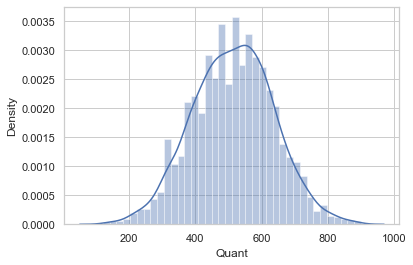

In [189]:
sns.distplot(df['Quant'])

On observing the above histogram we can see that people  average marks in Qunt is around 280 to 650 marks


((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([120, 135, 135, ..., 885, 900, 900], dtype=int64)),
 (122.33283129420094, 513.3781890945472, 0.9995592694212152))

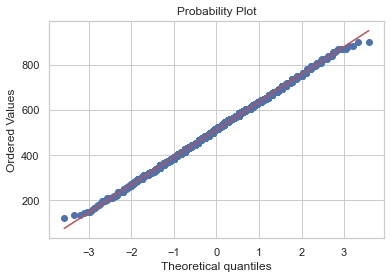

In [190]:
stats.probplot(df['Quant'],plot=plt)

The data is almost normally distributed 

<AxesSubplot:xlabel='Quant'>

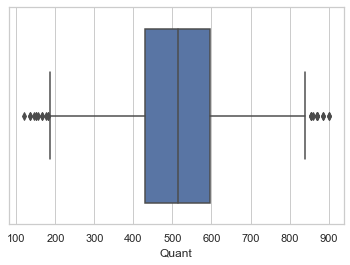

In [191]:
sns.boxplot(df['Quant'] )

In [192]:
Upper_lower_limites(df['Quant'])

(842.5, 182.5)

In [193]:
UL,LL= Upper_lower_limites(df['Quant'])

In [194]:
df[(df['Quant']<LL)|(df['Quant']>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
195,350000,delhi,m,82.00,cbse,81.20,cbse,6920,1,B.Tech/B.E.,...,1.0449,0.3174,-1.2486,0.8637,1,24,18,23,system engineer,CS
522,55000,other,m,75.06,State,63.40,State,8105,2,B.Tech/B.E.,...,0.0459,-0.1437,0.9066,0.2889,0,23,18,22,other,CS
564,185000,other,m,67.72,State,67.25,State,4959,2,B.Tech/B.E.,...,0.7119,0.3174,1.2869,1.0554,3,24,17,21,other,CS
698,300000,other,m,91.71,icse,88.83,icse,377,2,B.Tech/B.E.,...,1.0449,0.7785,-0.8682,0.8637,1,23,18,22,project engineer,EC
783,190000,chennai,m,75.00,cbse,79.00,State,1210,2,B.Tech/B.E.,...,-0.4536,-0.9122,0.6530,-0.6692,2,24,18,22,technical support engineer,EC
899,320000,bangalore,m,89.10,State,97.80,State,11509,1,B.Tech/B.E.,...,-0.2871,-1.2196,1.0333,0.0973,1,24,18,22,java software engineer,EC
1148,100000,other,m,79.75,State,67.57,State,7861,2,B.Tech/B.E.,...,0.0459,-0.1437,-0.3612,-0.4776,1,25,18,25,other,ME
1310,450000,bangalore,m,87.00,icse,92.50,icse,44,2,B.Tech/B.E.,...,-0.1206,-0.1437,-2.0092,-1.4356,1,24,18,23,software quality assurance tester,EC
1661,605000,hyderabad,m,78.80,cbse,87.00,cbse,527,2,B.Tech/B.E.,...,0.0459,0.1637,0.1459,0.4805,2,23,17,21,senior software engineer,CS
1815,205000,gurgaon,m,54.00,State,62.00,State,11759,2,B.Tech/B.E.,...,-0.6201,-0.7585,-0.7415,0.0973,1,22,17,21,java software engineer,CS


In [195]:
df[(df['Quant']<LL)|(df['Quant']>UL)].shape

(25, 36)

There are 25 outliers in the Quant data

Domain:Scores in AMCAT’s domain module

In [196]:
df.Domain.unique()

array([ 0.63597876,  0.96060325,  0.45087658,  0.97439611,  0.12450207,
       -1.        ,  0.35653649,  0.8295846 ,  0.69447933,  0.49359639,
        0.76567358,  0.9682375 ,  0.22948175,  0.53838689,  0.30840058,
        0.91139528,  0.56326782,  0.86468541,  0.64938971,  0.74475835,
        0.88412251,  0.88162007,  0.20739217,  0.48674701,  0.67074315,
        0.62264292,  0.41383826,  0.52592258,  0.73579571,  0.13044174,
        0.23780284,  0.11213944,  0.37755142,  0.06696071,  0.08005528,
        0.92564577,  0.84312373,  0.91686996,  0.78330354,  0.60005718,
        0.79293628,  0.79358061,  0.16563309,  0.75537512,  0.99990456,
        0.33878635,  0.91077016,  0.98205712,  0.84224832,  0.01854094,
        0.05316031,  0.94211655,  0.12301673,  0.48834798,  0.37605959,
        0.0587928 ,  0.10487136,  0.60064396,  0.70409041,  0.14478989,
        0.81941653,  0.65576694,  0.02106623,  0.44461772,  0.83762073,
        0.72598415,  0.95389978,  0.04099931,  0.02196911,  0.34

In [197]:
df.Domain.replace(-1,np.NaN,inplace=True)

<AxesSubplot:xlabel='Domain', ylabel='Density'>

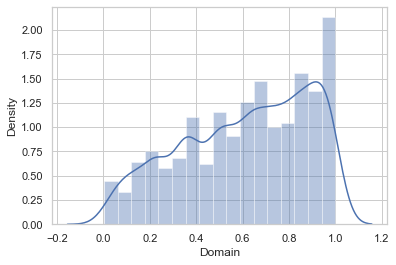

In [198]:
sns.distplot(df.Domain)

The people who got the marks in between 0.5 to 0.9 in Domain test is high

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([0.00275015, 0.00815478, 0.00815478, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

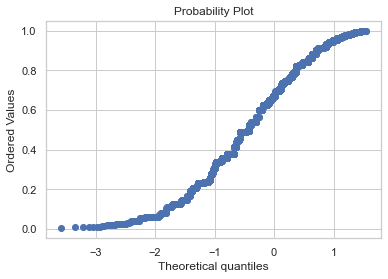

In [199]:
stats.probplot(df['Domain'],plot =plt)

Clearly data is not normly distributed 

<AxesSubplot:xlabel='Domain'>

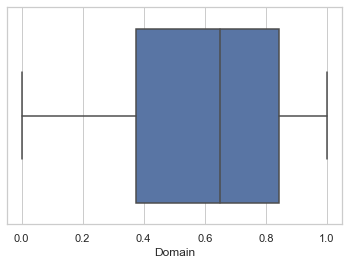

In [201]:
sns.boxplot(df['Domain'])

In [202]:
Upper_lower_limites(df.Domain)

(nan, nan)

In [203]:
df.Domain

0       0.635979
1       0.960603
2       0.450877
3       0.974396
4       0.124502
          ...   
3993    0.276047
3994    0.881620
3995    0.488348
3996    0.744758
3997    0.600057
Name: Domain, Length: 3998, dtype: float64

In [204]:
UL,LL = Upper_lower_limites(df.Domain)

In [205]:
df[(df['Domain']<LL)|(df['Domain']>UL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization


In [206]:
df[(df['Domain']<LL)|(df['Domain']>UL)].shape

(0, 36)

we have no outliers in the Domain data

In [207]:
df['ComputerProgramming'].value_counts()

-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 804      1
 840      1
 745      1
 105      1
 214      1
Name: ComputerProgramming, Length: 79, dtype: int64

There are more null values in the data

ComputerProgramming : Score in AMCAT’s Computer programming<br>section

In [208]:
df['ComputerProgramming'].replace(-1,np.NaN,inplace=True)

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Density'>

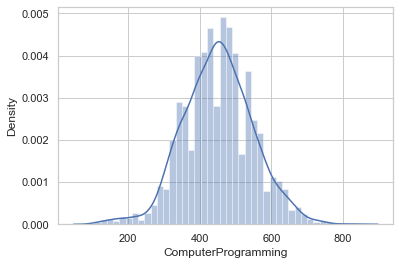

In [209]:
sns.distplot(df['ComputerProgramming'])

People mostly scored in B/W 300 and 600 in computer programing test

<AxesSubplot:xlabel='ComputerProgramming'>

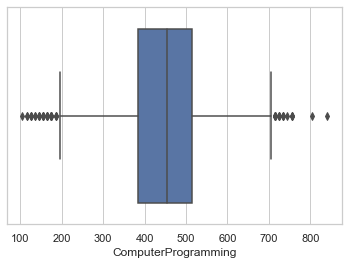

In [213]:
sns.boxplot(df['ComputerProgramming'])

In [211]:
[i for i in df['ComputerProgramming'] if i<0]

[]

In [215]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [239]:
df.replace(-1,np.NaN,inplace= True)

In [244]:
(df.isnull().sum()/df.shape[0])*100

Salary                    0.000000
JobCity                   0.000000
Gender                    0.000000
10percentage              0.000000
10board                   8.754377
12percentage              0.000000
12board                   8.979490
CollegeID                 0.000000
CollegeTier               0.000000
Degree                    0.000000
collegeGPA                0.000000
CollegeCityID             0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
conscientiousness         0.000000
agreeableness             0.000000
extraversion              0.000000
nueroticism         

By looking at this one we have more null values in below test's
- ElectronicsAndSemicon, 
- ComputerScience, 
- MechanicalEngg
- ElectricalEngg
- TelecomEngg
- CivilEngg

In [245]:
x= ['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']

In [246]:
df.drop(x,axis=1,inplace= True)

In [247]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [248]:
df.conscientiousness.describe(include=all)

count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

<AxesSubplot:xlabel='conscientiousness', ylabel='Density'>

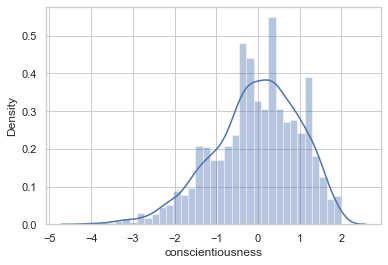

In [251]:
sns.distplot(df.conscientiousness)

In conscientiousness test most people's score is in b/w -1.5 to 1.5

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([-4.1267, -4.0369, -3.8933, ...,  1.9953,  1.9953,  1.9953])),
 (1.0190753631074438, -0.037831290645322924, 0.9899935063714488))

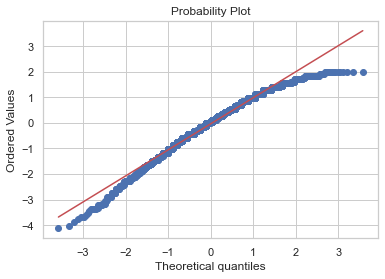

In [252]:
stats.probplot(df.conscientiousness,plot = plt)

Clearly data is not normally distributed

Data is not normally distributted

<AxesSubplot:xlabel='conscientiousness'>

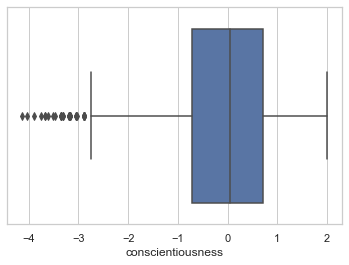

In [253]:
sns.boxplot(df.conscientiousness)

There are some outliers in the data

In [254]:
Upper_lower_limites(df['conscientiousness'])

(2.8270375000000003, -2.8378625000000004)

In [255]:
UL,LL = Upper_lower_limites(df['conscientiousness'])

In [256]:
df[(df['conscientiousness']>UL)|(df['conscientiousness']<LL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
29,220000,gurgaon,m,64.00,cbse,74.00,cbse,57,2,B.Tech/B.E.,...,-1.8393,0.0552,0.06230,-0.7615,0,22,18,22,java software engineer,CS
159,340000,kolkata,m,87.00,State,79.00,State,1906,2,B.Tech/B.E.,...,-4.2831,-3.2176,-1.12180,-5.2679,1,23,17,21,asp.net developer,CS
210,310000,lucknow,m,69.00,State,69.00,State,64,2,B.Tech/B.E.,...,-1.2153,-0.9245,-0.52530,-0.1295,2,25,17,23,network engineer,EC
315,360000,noida,m,80.00,cbse,75.40,cbse,7600,2,B.Tech/B.E.,...,-0.9033,-2.0856,1.58990,-1.8673,3,25,17,21,other,EC
335,120000,other,m,68.50,State,73.20,State,2085,2,B.Tech/B.E.,...,-5.6151,-4.6009,-2.00920,-6.9925,1,24,18,22,electrical engineer,EL
373,370000,kolkata,m,81.60,cbse,72.20,cbse,5026,2,B.Tech/B.E.,...,0.5008,-0.1988,0.88480,-0.9194,1,26,18,22,assistant manager,ME
382,260000,bangalore,f,79.89,State,62.83,State,1940,2,B.Tech/B.E.,...,-2.4633,-1.3599,0.17980,-3.4471,4,28,18,22,java software engineer,CS
408,280000,gurgaon,m,68.00,cbse,59.00,cbse,16674,2,MCA,...,-1.6191,-3.5250,0.27270,-0.4776,0,22,17,22,other,CS
468,240000,kolkata,m,82.00,State,83.00,State,5483,2,B.Tech/B.E.,...,-2.4516,0.0100,-0.23440,-1.0524,2,24,18,22,system engineer,CS
523,120000,hyderabad,f,63.00,cbse,64.00,State,9809,2,B.Tech/B.E.,...,-5.1156,-3.0639,-0.74150,-5.2679,1,24,18,22,other,CS


In [257]:
df[(df['conscientiousness']>UL)|(df['conscientiousness']<LL)].shape

(39, 29)

There are 39 outliers in the conscientiousness  column data

In [258]:
df.agreeableness.describe()

count    3998.000000
mean        0.146496
std         0.941782
min        -5.781600
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64

<AxesSubplot:xlabel='agreeableness', ylabel='Density'>

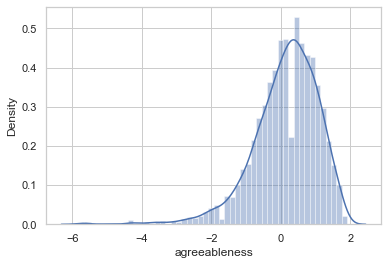

In [259]:
sns.distplot(df.agreeableness)

In agreeableness test most of the people scored in between -1 to 1

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([-5.7816, -5.7816, -5.6151, ...,  1.9048,  1.9048,  1.9048])),
 (0.9124411270278092, 0.1464958229114555, 0.9681767602496395))

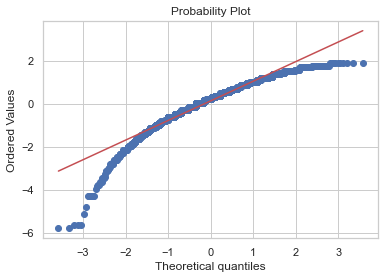

In [263]:
stats.probplot(df.agreeableness,plot = plt)

Data is not normally distributed

<AxesSubplot:xlabel='conscientiousness'>

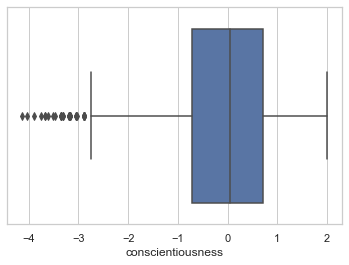

In [264]:
sns.boxplot(df.conscientiousness)

In [265]:
UL,LL = Upper_lower_limites(df.conscientiousness)

In [266]:
df[(df.conscientiousness>UL)|(df.conscientiousness<LL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
29,220000,gurgaon,m,64.00,cbse,74.00,cbse,57,2,B.Tech/B.E.,...,-1.8393,0.0552,0.06230,-0.7615,0,22,18,22,java software engineer,CS
159,340000,kolkata,m,87.00,State,79.00,State,1906,2,B.Tech/B.E.,...,-4.2831,-3.2176,-1.12180,-5.2679,1,23,17,21,asp.net developer,CS
210,310000,lucknow,m,69.00,State,69.00,State,64,2,B.Tech/B.E.,...,-1.2153,-0.9245,-0.52530,-0.1295,2,25,17,23,network engineer,EC
315,360000,noida,m,80.00,cbse,75.40,cbse,7600,2,B.Tech/B.E.,...,-0.9033,-2.0856,1.58990,-1.8673,3,25,17,21,other,EC
335,120000,other,m,68.50,State,73.20,State,2085,2,B.Tech/B.E.,...,-5.6151,-4.6009,-2.00920,-6.9925,1,24,18,22,electrical engineer,EL
373,370000,kolkata,m,81.60,cbse,72.20,cbse,5026,2,B.Tech/B.E.,...,0.5008,-0.1988,0.88480,-0.9194,1,26,18,22,assistant manager,ME
382,260000,bangalore,f,79.89,State,62.83,State,1940,2,B.Tech/B.E.,...,-2.4633,-1.3599,0.17980,-3.4471,4,28,18,22,java software engineer,CS
408,280000,gurgaon,m,68.00,cbse,59.00,cbse,16674,2,MCA,...,-1.6191,-3.5250,0.27270,-0.4776,0,22,17,22,other,CS
468,240000,kolkata,m,82.00,State,83.00,State,5483,2,B.Tech/B.E.,...,-2.4516,0.0100,-0.23440,-1.0524,2,24,18,22,system engineer,CS
523,120000,hyderabad,f,63.00,cbse,64.00,State,9809,2,B.Tech/B.E.,...,-5.1156,-3.0639,-0.74150,-5.2679,1,24,18,22,other,CS


There are 39 outliers in the conscientiousness test data

In [267]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [269]:
df['extraversion'].describe()

count    3998.000000
mean        0.002763
std         0.951471
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64

<AxesSubplot:xlabel='extraversion', ylabel='Density'>

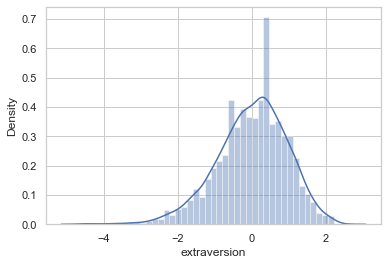

In [270]:
sns.distplot(df['extraversion'])

Most of the people are scored in -1.5 to 1 in the extraversion test

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([-4.6009, -4.6009, -4.4472, ...,  2.1617,  2.3154,  2.5354])),
 (0.9446633533421963, 0.0027629814907451987, 0.9921596755701637))

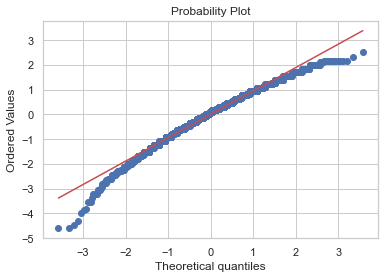

In [271]:
stats.probplot(df['extraversion'],plot = plt)

Data is not normally distributed

<AxesSubplot:xlabel='extraversion'>

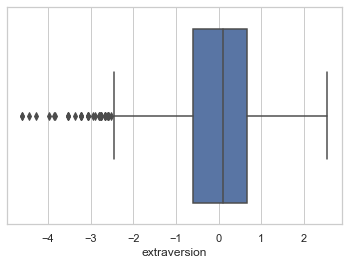

In [272]:
sns.boxplot(df['extraversion'])

There are some outliers in the data in extraversion column

In [273]:
UL,LL = Upper_lower_limites(df['extraversion'])

In [275]:
df[(df['extraversion']>UL)|(df['extraversion']<LL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
63,150000,other,m,60.66,State,62.40,State,9738,2,B.Tech/B.E.,...,-2.6847,-2.6028,0.39950,-5.4770,1,23,16,21,management trainee,ME
159,340000,kolkata,m,87.00,State,79.00,State,1906,2,B.Tech/B.E.,...,-4.2831,-3.2176,-1.12180,-5.2679,1,23,17,21,asp.net developer,CS
335,120000,other,m,68.50,State,73.20,State,2085,2,B.Tech/B.E.,...,-5.6151,-4.6009,-2.00920,-6.9925,1,24,18,22,electrical engineer,EL
408,280000,gurgaon,m,68.00,cbse,59.00,cbse,16674,2,MCA,...,-1.6191,-3.5250,0.27270,-0.4776,0,22,17,22,other,CS
523,120000,hyderabad,f,63.00,cbse,64.00,State,9809,2,B.Tech/B.E.,...,-5.1156,-3.0639,-0.74150,-5.2679,1,24,18,22,other,CS
666,110000,kolkata,m,59.60,cbse,60.00,cbse,14381,2,B.Tech/B.E.,...,-1.2861,-3.2176,-1.75560,-3.3518,1,24,17,22,software developer,CS
726,480000,mumbai,f,85.00,State,88.00,cbse,57,2,B.Tech/B.E.,...,-2.1903,-2.7750,0.41480,-0.4455,2,24,18,22,java software engineer,CS
1169,105000,delhi,m,48.50,State,59.77,State,17,2,MCA,...,-3.0874,-2.6662,0.06230,-3.4471,0,26,17,26,other,CS
1211,420000,gurgaon,m,80.00,cbse,70.00,cbse,9737,2,B.Tech/B.E.,...,-5.7816,-4.6009,-0.36120,-6.9925,2,24,18,22,other,EC
1217,600000,kolkata,m,73.00,State,71.00,State,9699,2,B.Tech/B.E.,...,-1.9521,-2.6028,0.01920,-2.5853,1,23,17,21,assistant manager,CS


There are 40 outliers in extraversion column

In [276]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [283]:
df.nueroticism.describe()

count    3998.000000
mean       -0.169033
std         1.007580
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64

<AxesSubplot:xlabel='nueroticism', ylabel='Density'>

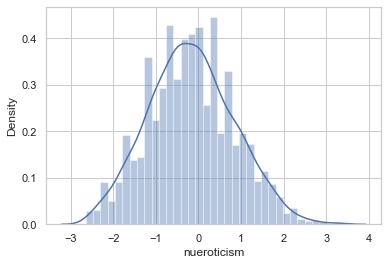

In [284]:
sns.distplot(df.nueroticism)

Most of teh people are scored in B/W -2 to 2 in nueroticism test

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([-2.643 , -2.643 , -2.643 , ...,  3.3152,  3.3525,  3.3525])),
 (1.0064989210801347, -0.16903257128564306, 0.9982382318649725))

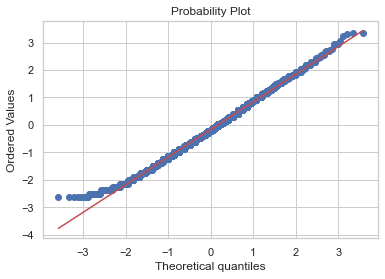

In [285]:
stats.probplot(df.nueroticism,plot= plt)

In [286]:
df.nueroticism.skew()

0.16570968491563792

In [287]:
df.nueroticism.kurt()

-0.1915388018144335

Data is almost normally distributed

<AxesSubplot:xlabel='nueroticism'>

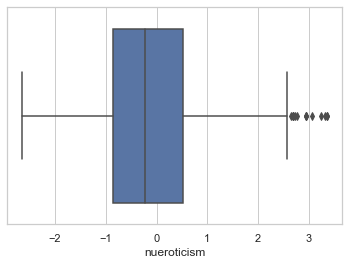

In [288]:
sns.boxplot(df.nueroticism)

There are some outliers in the nueroticism data

In [289]:
UL,LL = Upper_lower_limites(df.nueroticism)

In [290]:
df[(df.nueroticism>UL)|(df.nueroticism<LL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
222,100000,coimbatore,m,77.00,State,67.00,State,431,2,B.Tech/B.E.,...,1.2808,1.9782,2.6475,1.2923,0,24,18,22,programmer,CS
405,145000,other,m,79.00,State,66.00,State,17205,2,B.Tech/B.E.,...,1.7109,2.3154,2.9349,1.6302,1,23,17,22,sales executive,EC
1151,140000,bangalore,m,80.64,State,64.45,State,316,2,B.Tech/B.E.,...,1.2808,-0.0537,3.3525,0.9763,2,30,25,28,software engineer,EC
1191,445000,mumbai,m,79.80,NaN,77.00,NaN,4368,2,B.Tech/B.E.,...,1.9048,2.1234,3.3525,1.1343,2,24,17,21,system engineer,CS
1383,550000,hyderabad,m,80.50,State,95.00,State,2929,2,B.Tech/B.E.,...,1.5928,0.6720,3.2350,-0.8799,3,24,17,21,assistant manager,ME
1602,180000,noida,m,71.50,cbse,68.00,cbse,53,2,B.Tech/B.E.,...,0.5454,0.4711,2.6814,-1.0524,1,24,18,22,software test engineer,CS
1843,280000,hyderabad,m,61.00,State,63.00,State,5818,2,B.Tech/B.E.,...,-0.4536,-0.2974,3.0617,1.2470,2,24,17,22,software test engineer,EC
2054,335000,bangalore,f,90.00,State,87.00,State,3666,2,B.Tech/B.E.,...,0.9688,0.2366,2.7650,-0.0167,2,26,19,23,systems engineer,CS
2234,360000,delhi,m,54.00,cbse,49.00,State,11759,2,B.Tech/B.E.,...,-0.5913,-1.2148,2.7356,0.3444,1,26,20,24,other,CS
2275,100000,pune,m,70.58,State,60.36,State,3683,2,B.Tech/B.E.,...,0.7119,2.1617,2.9349,0.6721,1,25,18,23,software developer,CS


There are 15 outliers in the nueroticism data

In [277]:
df.openess_to_experience.describe()

count    3998.000000
mean       -0.138110
std         1.008075
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64

<AxesSubplot:xlabel='openess_to_experience', ylabel='Density'>

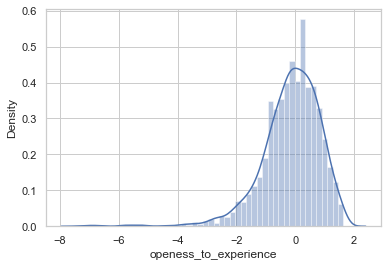

In [278]:
sns.distplot(df.openess_to_experience)

In openess_to_experience test most of the people are scored in b/W -2 to 1.5

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([-7.3757, -6.9925, -6.9925, ...,  1.6302,  1.6302,  1.8224])),
 (0.9656958295096163, -0.13811023011505766, 0.9572997865836598))

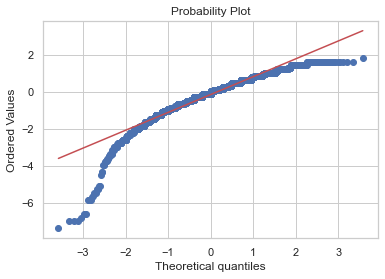

In [279]:
stats.probplot(df.openess_to_experience,plot=plt)

Data is not normally distributted

<AxesSubplot:xlabel='openess_to_experience'>

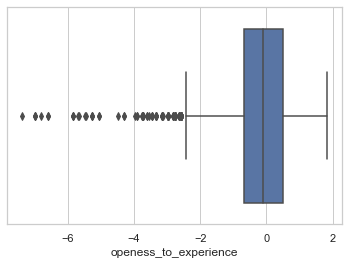

In [280]:
sns.boxplot(df.openess_to_experience)

There are some outliers in the data

In [281]:
UL,LL = Upper_lower_limites(df.openess_to_experience)

In [282]:
df[(df.openess_to_experience>UL)|(df.openess_to_experience<LL)]

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeID,CollegeTier,Degree,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
22,190000,hyderabad,m,92.50,State,95.20,State,8232,2,B.Tech/B.E.,...,-0.6201,-0.6048,0.7798,-2.7769,2,23,17,21,other,EC
23,180000,bangalore,m,70.00,State,43.42,State,11388,2,B.Tech/B.E.,...,-2.1186,-1.9881,-0.4879,-5.0763,1,29,20,28,other,EC
43,120000,hyderabad,m,59.00,State,87.70,State,16150,2,B.Tech/B.E.,...,-2.4516,-0.4511,0.2727,-3.1602,1,22,17,21,.net developer,EC
63,150000,other,m,60.66,State,62.40,State,9738,2,B.Tech/B.E.,...,-2.6847,-2.6028,0.3995,-5.4770,1,23,16,21,management trainee,ME
128,675000,noida,m,60.00,NaN,59.00,NaN,144,2,B.Tech/B.E.,...,-0.2793,-0.6343,-0.6428,-2.9731,4,27,16,23,senior software engineer,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,320000,jaipur,m,87.40,cbse,85.60,cbse,12906,2,B.Tech/B.E.,...,-0.6201,0.0100,-1.1218,-2.5853,2,24,18,22,project engineer,CE
3892,300000,noida,m,78.00,cbse,68.50,cbse,14004,2,B.Tech/B.E.,...,-1.1196,0.0100,-1.5021,-2.7769,1,23,18,22,other,EC
3901,390000,pune,m,73.20,cbse,76.80,cbse,457,2,B.Tech/B.E.,...,0.2124,-0.1437,-1.3753,-2.7769,2,23,17,21,other,CS
3918,120000,noida,f,62.00,cbse,53.20,State,14720,2,B.Tech/B.E.,...,-1.6191,-1.6807,-0.3612,-2.9686,1,22,17,21,system administrator,EC


95 outliers in the openess_to_experience test data

In [291]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'experinace', 'age', '12GradAge', 'GradAge', 'designation',
       'specialization'],
      dtype='object')

In [292]:
df.experinace.value_counts()

1     1946
2      879
0      484
3      420
4      202
5       63
9        1
24       1
8        1
6        1
Name: experinace, dtype: int64

<AxesSubplot:xlabel='experinace', ylabel='count'>

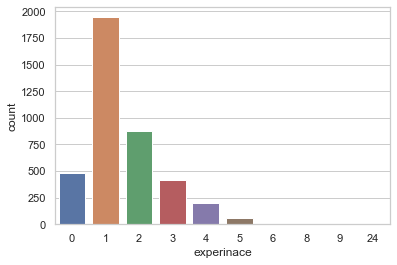

In [294]:
sns.countplot(df.experinace)

The peole whos experince is one year is more in data

In [295]:
df.age.value_counts()

24    1020
23    1015
25     716
22     439
26     388
27     215
21      75
28      66
29      30
30      17
31       5
32       4
20       4
19       2
36       1
18       1
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

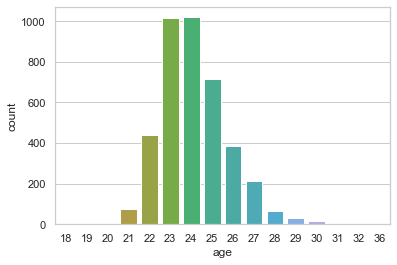

In [296]:
sns.countplot(df.age)

The people who's age is 23,24 are more in data

In [297]:
df['12GradAge'].value_counts()

18    1832
17    1486
19     374
16     200
20      58
15      18
21      17
22       8
13       2
25       1
23       1
24       1
Name: 12GradAge, dtype: int64

<AxesSubplot:xlabel='12GradAge', ylabel='count'>

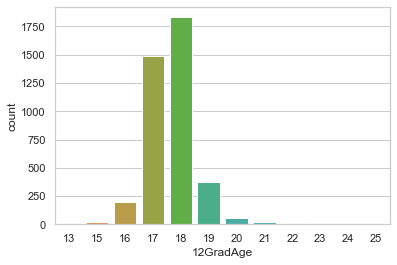

In [298]:
sns.countplot(df['12GradAge'])

the people who completed there 12GradAge at the age of 18,19 are more in data

In [301]:
df.drop(['CollegeID','CollegeCityID'],axis=1,inplace=True)

In [302]:
df.isnull().sum()

Salary                     0
JobCity                    0
Gender                     0
10percentage               0
10board                  350
12percentage               0
12board                  359
CollegeTier                0
Degree                     0
collegeGPA                 0
CollegeCityTier            0
CollegeState               0
English                    0
Logical                    0
Quant                      0
Domain                   246
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
experinace                 0
age                        0
12GradAge                  0
GradAge                    0
designation                0
specialization             0
dtype: int64

In [303]:
df['12board'].fillna(df['12board'].mode()[0],axis=0,inplace=True)

In [307]:
df['10board'].fillna(df['10board'].mode()[0],axis=0,inplace=True)
df['Domain'].fillna(df['Domain'].mean(),axis=0,inplace=True)

In [308]:
df.isnull().sum()

Salary                   0
JobCity                  0
Gender                   0
10percentage             0
10board                  0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
English                  0
Logical                  0
Quant                    0
Domain                   0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
experinace               0
age                      0
12GradAge                0
GradAge                  0
designation              0
specialization           0
dtype: int64

# Bivariant Analysis

In [309]:
df.head()

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
0,420000,bangalore,f,84.3,State,95.8,State,2,B.Tech/B.E.,78.00,...,0.8128,0.5269,1.35490,-0.4455,3,25,17,21,other,CS
1,500000,indore,m,85.4,cbse,85.0,cbse,2,B.Tech/B.E.,70.06,...,0.3789,1.2396,-0.10760,0.8637,2,26,18,23,assistant manager,EC
2,325000,chennai,f,85.0,cbse,68.2,cbse,2,B.Tech/B.E.,70.00,...,1.7109,0.1637,-0.86820,0.6721,1,23,18,22,systems engineer,CS
3,1100000,gurgaon,m,85.6,cbse,83.6,cbse,1,B.Tech/B.E.,74.64,...,0.3448,-0.3440,-0.40780,-0.9194,4,26,18,22,senior software engineer,CS
4,200000,other,m,78.0,cbse,76.8,cbse,2,B.Tech/B.E.,73.90,...,-0.2793,-1.0697,0.09163,-0.1295,1,24,17,21,other,EC


In [310]:
df.groupby(['JobCity'])['Salary'].mean()

JobCity
ahmedabad      266666.666667
bangalore      352773.775216
bhopal         235000.000000
bhubaneswar    239230.769231
chandigarh     327592.592593
chennai        290079.365079
coimbatore     275476.190476
delhi          271541.850220
faridabad      203055.555556
ghaziabad      154062.500000
gurgaon        336880.952381
hyderabad      306514.745308
indore         237800.000000
jaipur         252115.384615
kolkata        250762.711864
lucknow        213750.000000
mumbai         363051.948052
mysore         290526.315789
noida          295821.002387
other          296184.056272
pune           330750.000000
trivandrum     293125.000000
Name: Salary, dtype: float64

<AxesSubplot:xlabel='JobCity', ylabel='Salary'>

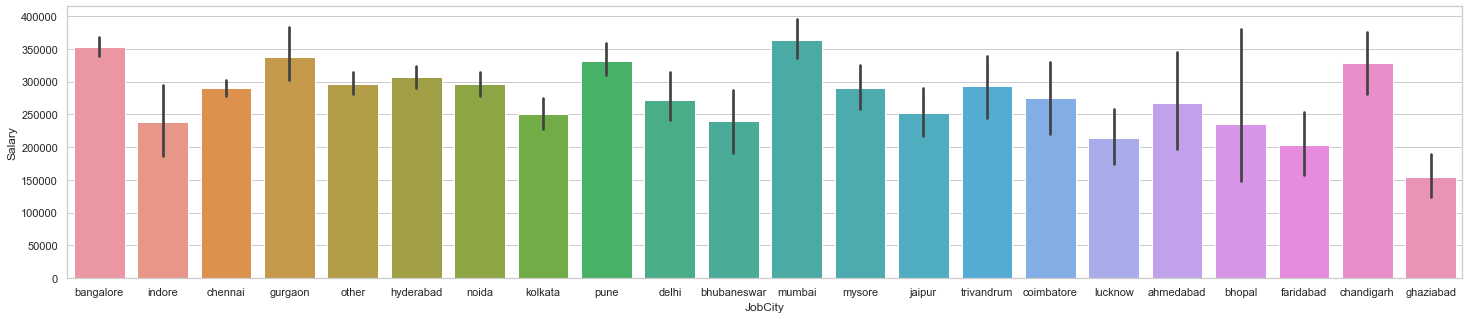

In [311]:
plt.figure(figsize=(25,5))
sns.barplot(x='JobCity',y='Salary',data=df)

By looking in the  graph average salary in the mumbai is more when comapred to other 

<AxesSubplot:xlabel='JobCity', ylabel='Salary'>

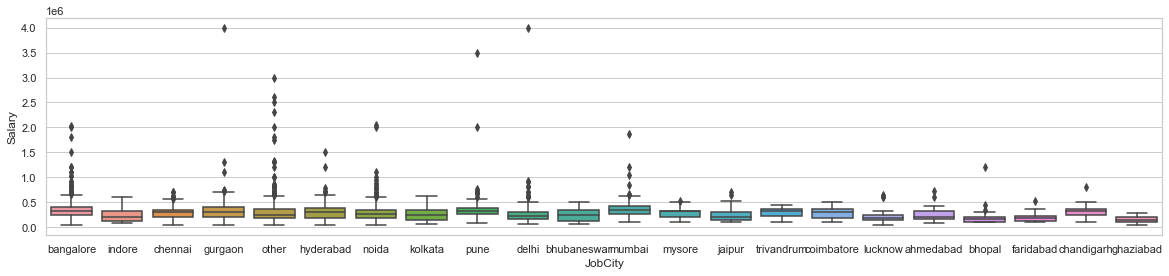

In [312]:
plt.figure(figsize=(20,4))
sns.boxplot(x= 'JobCity',y= 'Salary',data=df)

When we checked city wise there are some outliers in the data

In [313]:
df.groupby(['Gender'])['Salary'].mean()

Gender
f    294937.304075
m    311716.211772
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

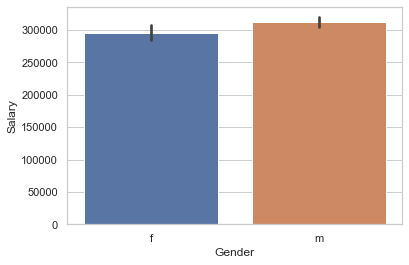

In [314]:
sns.barplot(x='Gender',y= 'Salary',data=df )

The average salary for men and women is almost same. For men it is slighly more

In [315]:
np.corrcoef(df['10percentage'],df['Salary'])

array([[1.        , 0.17737277],
       [0.17737277, 1.        ]])

The corelation B/W 10percentage and Salary is low

<AxesSubplot:xlabel='10percentage', ylabel='Salary'>

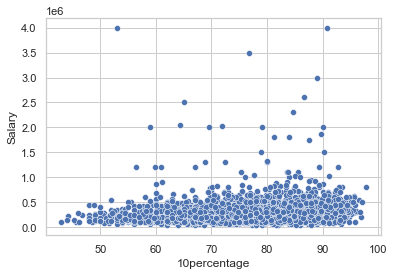

In [316]:

sns.scatterplot(df['10percentage'],df['Salary'])

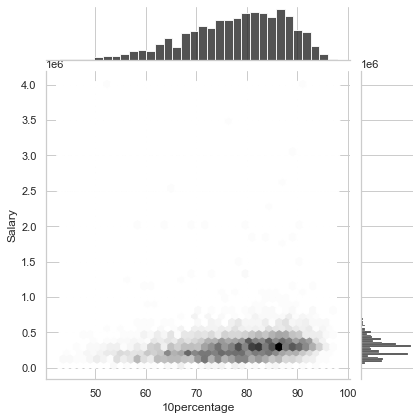

In [317]:
sns.jointplot(x=df['10percentage'], y=df['Salary'], data=df, kind='hex', color='k')

Most of the data points are after 70% 

In [318]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'experinace', 'age',
       '12GradAge', 'GradAge', 'designation', 'specialization'],
      dtype='object')

In [319]:
df.groupby(df['10board'])['Salary'].mean()

10board
State    299186.822713
cbse     314904.119318
icse     341254.416961
Name: Salary, dtype: float64

<AxesSubplot:xlabel='10board', ylabel='Salary'>

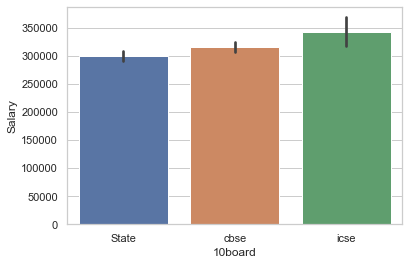

In [320]:
sns.barplot(x='10board',y= 'Salary',data=df)

<AxesSubplot:xlabel='10board', ylabel='Salary'>

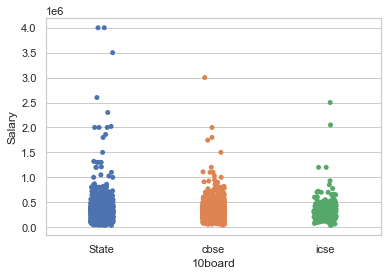

In [321]:
sns.stripplot(x='10board',y= 'Salary',data=df)

<AxesSubplot:xlabel='10board', ylabel='Salary'>

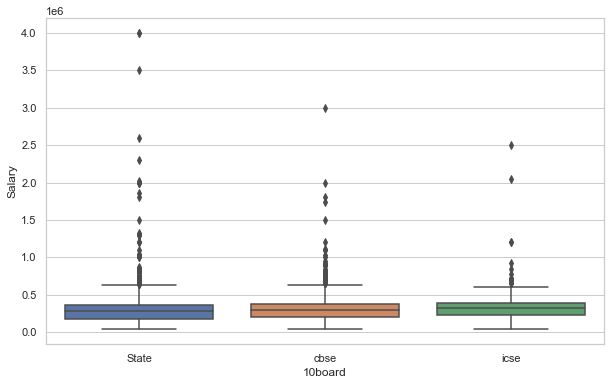

In [322]:
plt.figure(figsize=(10,6))
sns.boxplot(x='10board',y= 'Salary',data=df)

The people who are from the icse, cbse are getting more average salary when comapred to other  

In [323]:
np.corrcoef(df['12percentage'],df['Salary'])

array([[1.        , 0.17025448],
       [0.17025448, 1.        ]])

<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

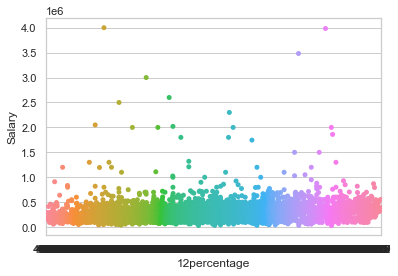

In [324]:
sns.swarmplot(x='12percentage',y= 'Salary',data=df)

By looking the data there is no corelation b/w 12percentage,Salary

In [325]:
df.groupby(df['12board'])['Salary'].mean()

12board
State    300051.537822
cbse     314713.578501
icse     355365.168539
Name: Salary, dtype: float64

<AxesSubplot:xlabel='12board', ylabel='Salary'>

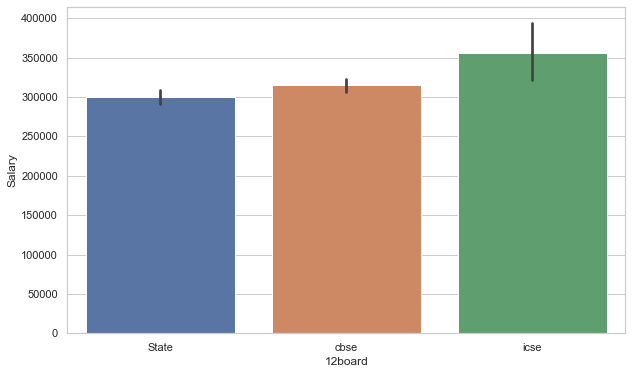

In [326]:
plt.figure(figsize=(10,6))
sns.barplot(y= 'Salary',x= '12board',data=df)

The people from icse board are getting more salaries when comared to other

<AxesSubplot:xlabel='12board', ylabel='Salary'>

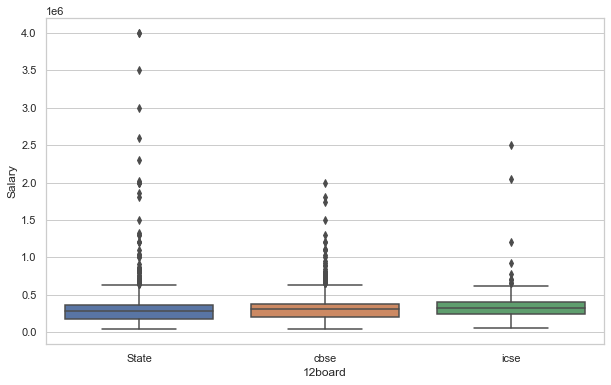

In [327]:
plt.figure(figsize=(10,6))
sns.boxplot(x='12board',y= 'Salary',data=df)

In [328]:
df.groupby(df['CollegeTier'])['Salary'].mean()

CollegeTier
1    442356.902357
2    296893.812483
Name: Salary, dtype: float64

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

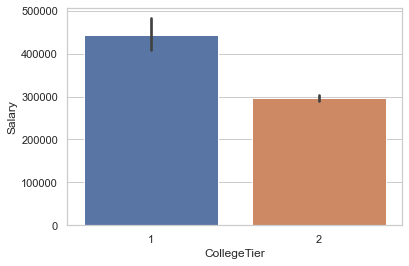

In [329]:
sns.barplot(x=df['CollegeTier'],y=df['Salary'],data=df)

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

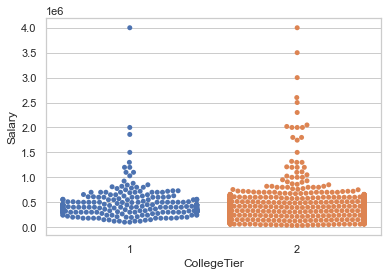

In [330]:
sns.swarmplot(x=df['CollegeTier'],y=df['Salary'],data=df)

Average salary of the tier1 collage is more when comapared to tier2 

In [331]:
df.groupby(['Degree'])['Salary'].mean()

Degree
B.Tech/B.E.      308622.702703
M.Sc. (Tech.)    320000.000000
M.Tech./M.E.     366132.075472
MCA              280802.469136
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

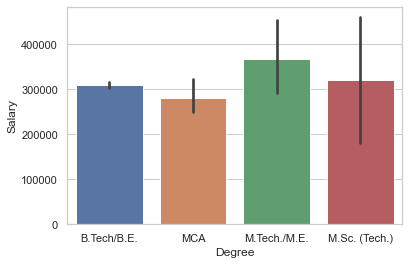

In [332]:
sns.barplot(x='Degree',y='Salary',data=df)

The people who completed M.Tech./M.E are avg salary more when comapred to other

In [333]:
df.groupby(['CollegeState'])['Salary'].mean()

CollegeState
Andhra Pradesh       324488.888889
Assam                452000.000000
Bihar                287000.000000
Chhattisgarh         261666.666667
Delhi                363179.012346
Goa                  450000.000000
Gujarat              321666.666667
Haryana              299916.666667
Himachal Pradesh     320312.500000
Jammu and Kashmir    396428.571429
Jharkhand            479285.714286
Karnataka            324310.810811
Kerala               278030.303030
Madhya Pradesh       331137.566138
Maharashtra          301545.801527
Meghalaya            537500.000000
Orissa               310203.488372
Punjab               304663.212435
Rajasthan            319626.436782
Sikkim               360000.000000
Tamil Nadu           280694.822888
Telangana            300344.827586
Union Territory      186000.000000
Uttar Pradesh        298966.120219
Uttarakhand          302300.884956
West Bengal          278137.755102
Name: Salary, dtype: float64

<AxesSubplot:xlabel='CollegeState', ylabel='Salary'>

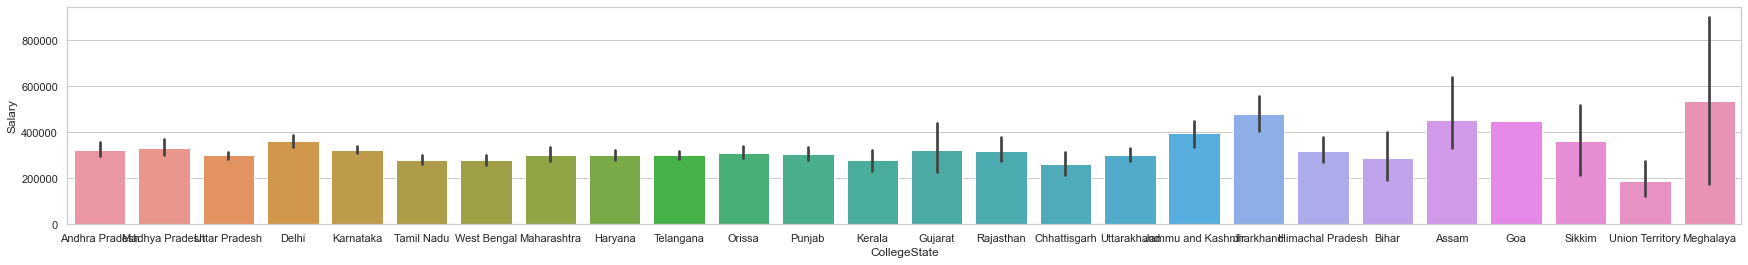

In [334]:
plt.figure(figsize=(30,4))
sns.barplot(x='CollegeState',y='Salary',data=df)

In [335]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'experinace', 'age',
       '12GradAge', 'GradAge', 'designation', 'specialization'],
      dtype='object')

In [336]:
df[['English','Salary']].corr()

,English,Salary
English,1.000000,0.178219
Salary,0.178219,1.000000


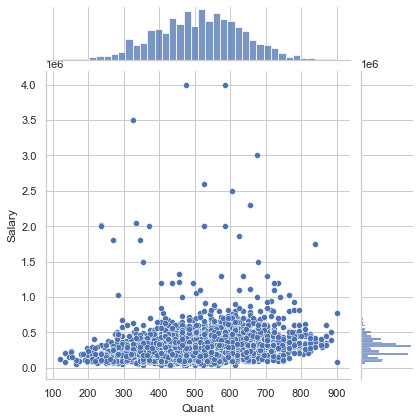

In [337]:
sns.jointplot(x=df['Quant'],y=df['Salary'],data=df ,kind= 'scatter')

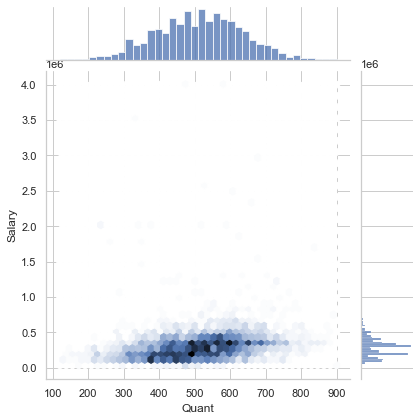

In [338]:
sns.jointplot(x=df['Quant'],y=df['Salary'],data=df ,kind= 'hex')

In [339]:
df[['Logical','Salary']].corr()

,Logical,Salary
Logical,1.000000,0.179275
Salary,0.179275,1.000000


<AxesSubplot:xlabel='Logical', ylabel='Salary'>

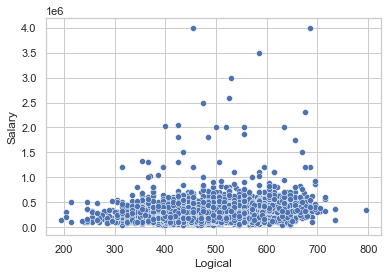

In [340]:
sns.scatterplot(x=df['Logical'],y=df['Salary'],data=df)

The corelation B/w is weak positive corrlation between the variables 

In [341]:
df[['Quant','Salary']].corr()

,Quant,Salary
Quant,1.000000,0.230627
Salary,0.230627,1.000000


<AxesSubplot:xlabel='Quant', ylabel='Salary'>

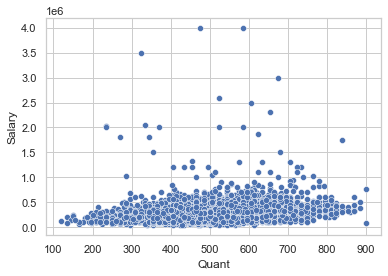

In [342]:
sns.scatterplot(x=df['Quant'],y=df['Salary'],data=df)

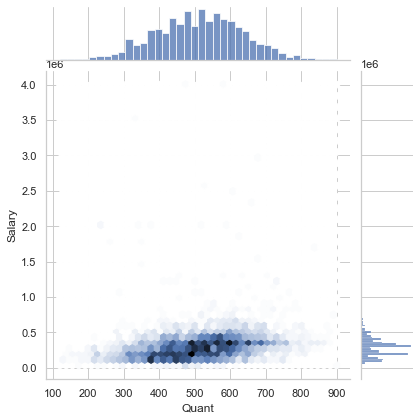

In [343]:
sns.jointplot(x=df['Quant'],y=df['Salary'],data=df,kind='hex' )

the dense data B/W 380 and 600

In [346]:
df[['conscientiousness','Salary']].corr()

,conscientiousness,Salary
conscientiousness,1.000000,-0.064148
Salary,-0.064148,1.000000


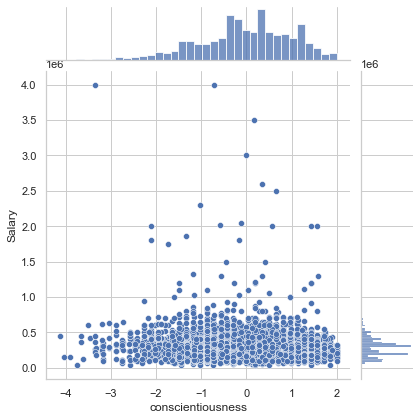

In [347]:
sns.jointplot(x='conscientiousness',y = 'Salary',data=df,kind='scatter')

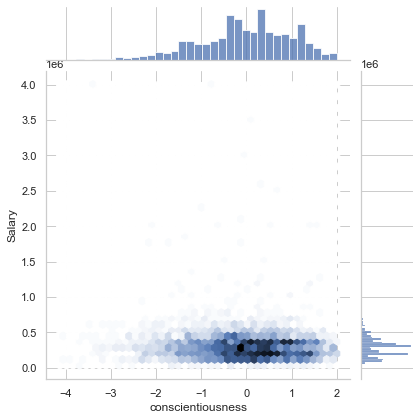

In [348]:
sns.jointplot(x='conscientiousness',y = 'Salary',data=df,kind='hex')

There is negitive very week corrleation b/w  conscientiousness and salary

In [349]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'experinace', 'age',
       '12GradAge', 'GradAge', 'designation', 'specialization'],
      dtype='object')

In [358]:
df2 = df[['Domain', 'conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience','Salary']].corr()

In [359]:
df2

,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
Domain,1.000000,-0.009745,0.092925,-0.028769,-0.098408,0.019878,0.170091
conscientiousness,-0.009745,1.000000,0.481820,0.355537,-0.330312,0.395649,-0.064148
agreeableness,0.092925,0.481820,1.000000,0.454369,-0.207480,0.591541,0.057423
extraversion,-0.028769,0.355537,0.454369,1.000000,-0.096491,0.435074,-0.010213
nueroticism,-0.098408,-0.330312,-0.207480,-0.096491,1.000000,-0.065795,-0.054685
openess_to_experience,0.019878,0.395649,0.591541,0.435074,-0.065795,1.000000,-0.011312
Salary,0.170091,-0.064148,0.057423,-0.010213,-0.054685,-0.011312,1.000000


<AxesSubplot:>

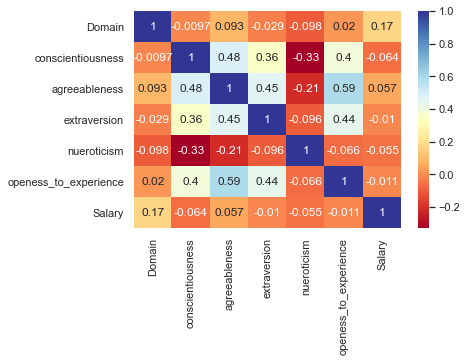

In [368]:
sns.heatmap(df2,annot=True,cmap='RdYlBu')

The all the above featueres and salary the corelation is very low

In [384]:
df.groupby(['designation'])['Salary'].mean()

designation
.net developer                       223382.352941
android developer                    200760.869565
application developer                419038.461538
application engineer                 278181.818182
asp.net developer                    208269.230769
assistant manager                    442692.307692
assistant system engineer            482391.304348
associate software engineer          307065.217391
automation engineer                  640666.666667
business analyst                     336428.571429
customer service                     170000.000000
customer service representative      171764.705882
data analyst                         232653.061224
design engineer                      327142.857143
electrical engineer                  290652.173913
embedded software engineer           341250.000000
engineer                             332340.425532
java developer                       245000.000000
java software engineer               301306.306306
lecturer           

<AxesSubplot:xlabel='designation', ylabel='Salary'>

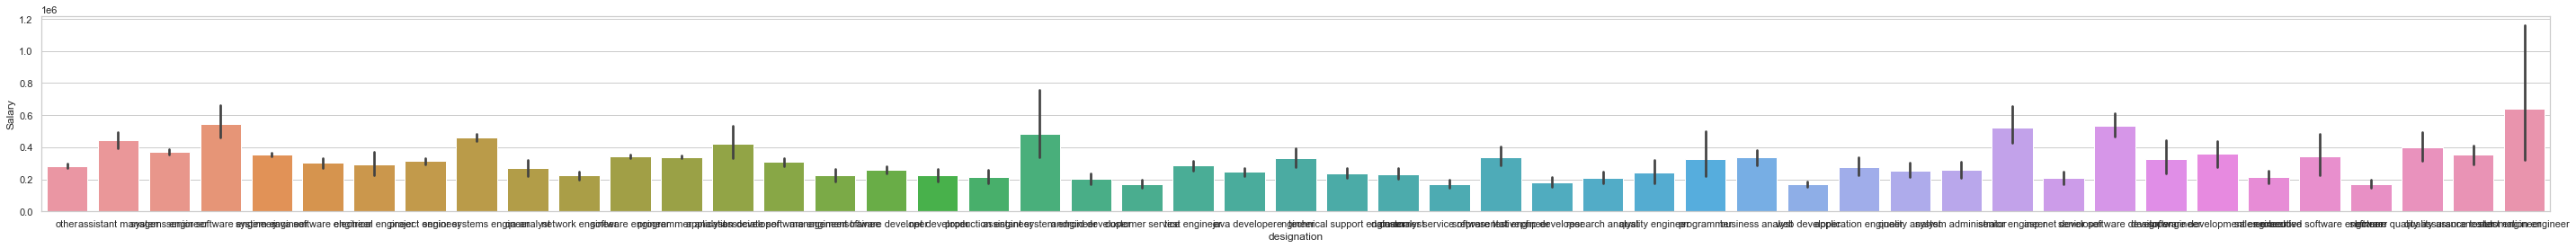

In [379]:
plt.figure(figsize=(50,4))
sns.barplot(x= 'designation',y = 'Salary',data=df)

On and average automation engineers are getting highest salary

In [388]:
df.groupby(['specialization'])['Salary'].mean()

specialization
CE       381206.896552
CS       312020.532984
EC       298798.332070
EL       289529.411765
ME       310836.363636
other    317946.428571
Name: Salary, dtype: float64

<AxesSubplot:xlabel='specialization', ylabel='Salary'>

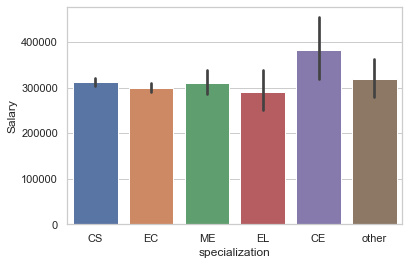

In [387]:

sns.barplot(x= 'specialization',y = 'Salary',data=df)

Avg salary for the civil engnieering compared to other branchs  

In [389]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'experinace', 'age',
       '12GradAge', 'GradAge', 'designation', 'specialization'],
      dtype='object')

### Let's take some importent columns and check relation b/w them

In [393]:
x= df[['Salary', 'JobCity', 'Gender','collegeGPA','English','designation','specialization','experinace']]

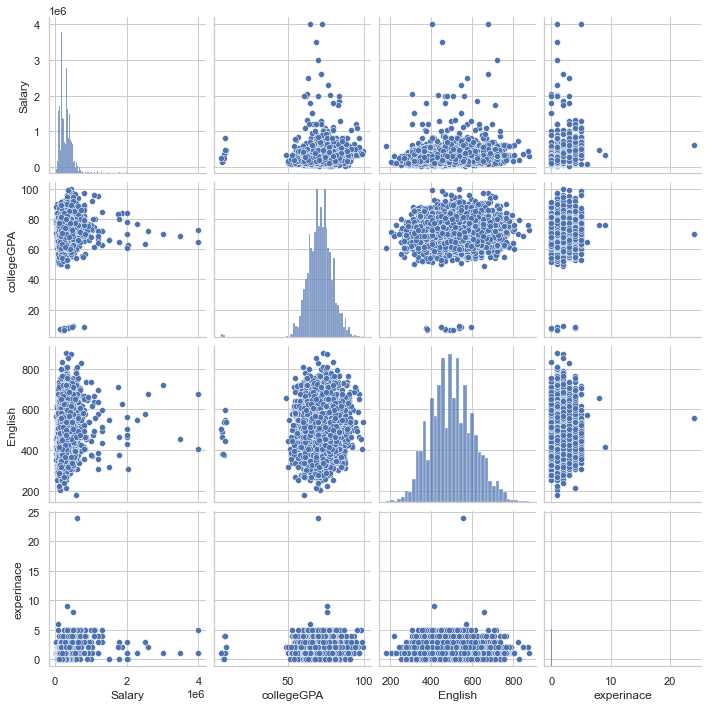

In [394]:
sns.pairplot(x)

### conclusions or obervations

- The people who are doing the job bangalore are more in the data.
- People from computer background and elctrical backgroud are more.
- people who are software jobs are more.
- Most of the people's highest degree is B.tech or B.E.
- specalization depends on gender.

# Step 5
### Question 2

Q : Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [395]:
df[['specialization','Gender']]

,specialization,Gender
0,CS,f
1,EC,m
2,CS,f
3,CS,m
4,EC,m
...,...,...
3993,CS,m
3994,EC,f
3995,CS,m
3996,CS,f


In [396]:
pd.crosstab(df.specialization, df.Gender)

Gender,f,m
specialization,,
CE,6,23
CS,601,1688
EC,306,1013
EL,17,68
ME,12,208
other,15,41


# Chisquere test

Two no the relation two catagerical variables we use Chisqure test.



### step 1

- Let's define hypothesis 
  - Alternative Hypothesis
  $$ H_1 = They\ are\ depedent$$
  - Null Hypothesis
$$ H_ = They \ are \ Indepedent$$

### step 2:
- Define cross tab

In [397]:
pd.crosstab(df.specialization,df.Gender,margins=True)

Gender,f,m,All
specialization,,,
CE,6,23,29
CS,601,1688,2289
EC,306,1013,1319
EL,17,68,85
ME,12,208,220
other,15,41,56
All,957,3041,3998


### step 3 : 
static test : chisqure test

- calculate chisqure
$$ \chi^2 = \sum \frac{(o-e)^2}{e} $$

Where

- o = observation
- e = expect value 

$$ e= \frac {row total*col total}{Grand total}$$

In [398]:
observed = pd.crosstab(df.specialization,df.Gender)

In [399]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)


(49.57240850719072,
 1.6950209831469836e-09,
 5,
 array([[   6.94172086,   22.05827914],
        [ 547.9172086 , 1741.0827914 ],
        [ 315.72861431, 1003.27138569],
        [  20.34642321,   64.65357679],
        [  52.66133067,  167.33866933],
        [  13.40470235,   42.59529765]]))

In [400]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degree_fredom = chi2_contingency(observed)[2]


In [401]:
chi2_test_stat

49.57240850719072

# step 4

$ calcilate\ \alpha \ by\ defining \ cofindence level \ and \ calculate \ chisqure\ critical$

In [402]:
confidence_level = 0.98
alpha = 1-confidence_level
chi2_critical = chi2.ppf(1 - alpha, degree_fredom)



chi2_critical


13.38822259903634

#### step 5

- validation

In [403]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [404]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


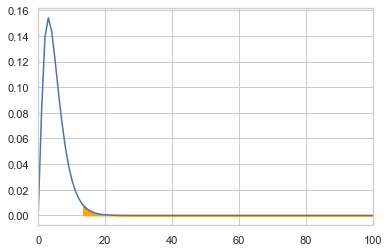

In [405]:
 #Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, degree_fredom)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, degree_fredom)
plt.fill_between(x1, y1, color='orange')


In [406]:
df.head()

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
0,420000,bangalore,f,84.3,State,95.8,State,2,B.Tech/B.E.,78.00,...,0.8128,0.5269,1.35490,-0.4455,3,25,17,21,other,CS
1,500000,indore,m,85.4,cbse,85.0,cbse,2,B.Tech/B.E.,70.06,...,0.3789,1.2396,-0.10760,0.8637,2,26,18,23,assistant manager,EC
2,325000,chennai,f,85.0,cbse,68.2,cbse,2,B.Tech/B.E.,70.00,...,1.7109,0.1637,-0.86820,0.6721,1,23,18,22,systems engineer,CS
3,1100000,gurgaon,m,85.6,cbse,83.6,cbse,1,B.Tech/B.E.,74.64,...,0.3448,-0.3440,-0.40780,-0.9194,4,26,18,22,senior software engineer,CS
4,200000,other,m,78.0,cbse,76.8,cbse,2,B.Tech/B.E.,73.90,...,-0.2793,-1.0697,0.09163,-0.1295,1,24,17,21,other,EC


In [407]:
df.specialization.value_counts()

CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: specialization, dtype: int64

## Question 2
-	**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**

**Let's take requried data**

In [409]:
data = pd.read_excel('data.xlsx')

In [410]:
data['DOJ_year']= pd.DatetimeIndex(data['DOJ']).year
data['fresher']=abs(data['GraduationYear']-data['DOJ_year'])

In [411]:
data[['DOJ_year','GraduationYear']]


,DOJ_year,GraduationYear
0,2012,2011
1,2013,2012
2,2014,2014
3,2011,2011
4,2014,2012
...,...,...
3993,2011,2010
3994,2013,2013
3995,2013,2012
3996,2014,2014


In [412]:
data[data['fresher']==0].shape

(2289, 41)

In [413]:
df.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'experinace', 'age',
       '12GradAge', 'GradAge', 'designation', 'specialization'],
      dtype='object')

In [414]:
# lets take dummy dataframe with requried features

df1 = df[['Salary','specialization','designation']]

In [415]:
df1.head()

,Salary,specialization,designation
0,420000,CS,other
1,500000,EC,assistant manager
2,325000,CS,systems engineer
3,1100000,CS,senior software engineer
4,200000,EC,other


In [416]:
df1['fresher']  = data['fresher']

In [417]:
df1.head()

,Salary,specialization,designation,fresher
0,420000,CS,other,1
1,500000,EC,assistant manager,1
2,325000,CS,systems engineer,0
3,1100000,CS,senior software engineer,0
4,200000,EC,other,2


In [418]:
df1 = df1[df1.specialization=='CS']

In [419]:
df1 =df1[df1['fresher']==0]

In [420]:
df1 =df1.reset_index()

In [421]:
df1.head()

,index,Salary,specialization,designation,fresher
0,2,325000,CS,systems engineer,0
1,3,1100000,CS,senior software engineer,0
2,6,300000,CS,java software engineer,0
3,11,450000,CS,senior systems engineer,0
4,17,250000,CS,other,0


In [422]:
df1.columns

Index(['index', 'Salary', 'specialization', 'designation', 'fresher'], dtype='object')

In [423]:
df2  = pd.DataFrame(columns=['index','Salary', 'specialization', 'designation', 'fresher'] )

In [ ]:
Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer

In [424]:
x = ['software engineer','system engineer','programmer analyst','java software engineer','network engineer','associate software engineer','assistant system engineer','software development engineer',
'programmer analyst','embedded software engineer', 'systems engineer','system engineer']



In [425]:
count = []
for i in df1.index:
    if df1['designation'][i] in x:
        count.append(i)
    

In [426]:
len(count)

470

In [427]:
for i in df1.index:
    if i not in count:
        df1.drop(i,axis=0,inplace =True)

In [428]:
df1.shape

(470, 5)

In [429]:
df1.head()

,index,Salary,specialization,designation,fresher
0,2,325000,CS,systems engineer,0
2,6,300000,CS,java software engineer,0
5,20,320000,CS,software engineer,0
6,21,200000,CS,software engineer,0
7,24,335000,CS,programmer analyst,0


**Finally we got the required data with required designation in computer scince background**

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**

let's do hypothesis testing

### step 1

Alternative hypothesis :
        $$ H_1 \Rightarrow (\ p>2.5\ laksh \ )$$
Null hypothesis:
        $$         H_0 \Rightarrow (p \leq2.5 \ laksh)  $$

### step 2 :
let's take sample from the data

In [430]:
import random

In [431]:
random.seed(4)

In [432]:
samples = random.sample(range(0, df1.shape[0]), 50)


In [433]:
df2 = df1.iloc[samples]


In [434]:
pop_mean = 250000

sample_mean =  df2.Salary.mean()
sample_std = sts.stdev(df1.Salary)
n = df2.shape[0]

### step 3 
- Do the test stastics on the sample

$$ T-score = \frac {\overline x - \mu}{s/ \sqrt(n)} $$

In [435]:
def t_score(sample_mean,pop_mean,sample_std,n):
    numarator = sample_mean-pop_mean
    denominator = sample_std/math.sqrt(n)
    t_score = numarator/denominator
    return(t_score)

In [436]:
t_stat = t_score(sample_mean,pop_mean,sample_std,n)

In [437]:

t_stat

4.460814977379252

### step 4

- Define the confidence level and calculate $\alpha$
- calculate t_critical $$ t_{(df, \ \alpha)} $$
- where
  - df = sample size-1
  - $\alpha$ = 1- confidence level

In [438]:
from scipy.stats import t

In [439]:
#let's define the confidence level and alpha

confidence_level  = 0.98
alpha = 1-confidence_level
degree_fredom = n-1
t_critical = t.ppf(1-alpha,degree_fredom)

In [440]:
t_critical

2.1098727145224814

In [441]:
if (t_stat>t_critical):
    print('Reject the Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject the Null Hypothesis


In [442]:
p_value = 1.0 - t.cdf(t_stat,df=degree_fredom)
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  2.387441160300874e-05
Reject Null Hypothesis


**So we can say for freseher average salary is  more then 2.5 Lakhs**

## step 7



In [447]:
df.specialization.dtype

dtype('O')

In [454]:
from sklearn.preprocessing import LabelEncoder

In [462]:
cat_two = []
cat_more_then_two = []
for i in df.columns:
    if df[i].dtype=='O' and df[i].nunique()==2:
        cat_two.append(i)
    elif df[i].dtype=='O' and df[i].nunique()>2:
        cat_more_then_two.append(i)

In [464]:
cat_more_then_two

['JobCity',
 '10board',
 '12board',
 'Degree',
 'CollegeState',
 'designation',
 'specialization']

In [460]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True,prefix='Gender')

In [461]:
La = LabelEncoder()

In [468]:
for i in cat_more_then_two:
    df[i]= La.fit_transform(df[i])

In [471]:
df.head()

,Salary,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,...,agreeableness,extraversion,nueroticism,openess_to_experience,experinace,age,12GradAge,GradAge,designation,specialization
0,420000,1,0,84.3,0,95.8,0,2,0,78.00,...,0.8128,0.5269,1.35490,-0.4455,3,25,17,21,22,1
1,500000,12,1,85.4,1,85.0,1,2,0,70.06,...,0.3789,1.2396,-0.10760,0.8637,2,26,18,23,5,2
2,325000,5,0,85.0,1,68.2,1,2,0,70.00,...,1.7109,0.1637,-0.86820,0.6721,1,23,18,22,45,1
3,1100000,10,1,85.6,1,83.6,1,1,0,74.64,...,0.3448,-0.3440,-0.40780,-0.9194,4,26,18,22,36,1
4,200000,19,1,78.0,1,76.8,1,2,0,73.90,...,-0.2793,-1.0697,0.09163,-0.1295,1,24,17,21,22,2


In [472]:
from sklearn.preprocessing import StandardScaler

In [473]:
SS = StandardScaler()

In [475]:
df=  SS.fit_transform(df)

In [476]:
df

array([[ 0.52794734, -1.54448086, -1.78259318, ..., -0.05374052,
        -0.48234131, -0.65638603],
       [ 0.90404468,  0.01618224,  0.56098049, ...,  0.01045267,
        -1.8545237 ,  0.46316659],
       [ 0.08133175, -0.97696701, -1.78259318, ..., -0.02164393,
         1.37414075, -0.65638603],
       ...,
       [ 0.05782567, -1.54448086,  0.56098049, ..., -0.05374052,
        -1.69309048, -0.65638603],
       [-0.50632033,  1.00933148, -1.78259318, ..., -0.02164393,
         0.80912447, -0.65638603],
       [ 0.43392301, -0.97696701, -1.78259318, ..., -0.05374052,
         0.72840786, -0.65638603]])